# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif,VarianceThreshold,RFE,chi2,SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer, KNNImputer
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTENC,SMOTE
from xgboost import XGBClassifier
from mlxtend.evaluate import bias_variance_decomp
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Load Dataset

In [2]:
term_df=pd.read_csv(r"bank_customer_survey.csv")
term_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


# EDA

### Data Info

In [53]:
term_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [54]:
duplicate=term_df.duplicated().sum()
duplicate[duplicate>0]

array([], dtype=int64)

### Statistical Info

In [55]:
term_df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


##### It shows that the data which would be loaded in the model does not have a lot of variation overall.

In [56]:
term_df.describe(include="object")

,job,marital,education,default,housing,loan,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4
top,blue,married,secondary,no,yes,no,cellular,may,unknown
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959


### Analysis

### Univariate

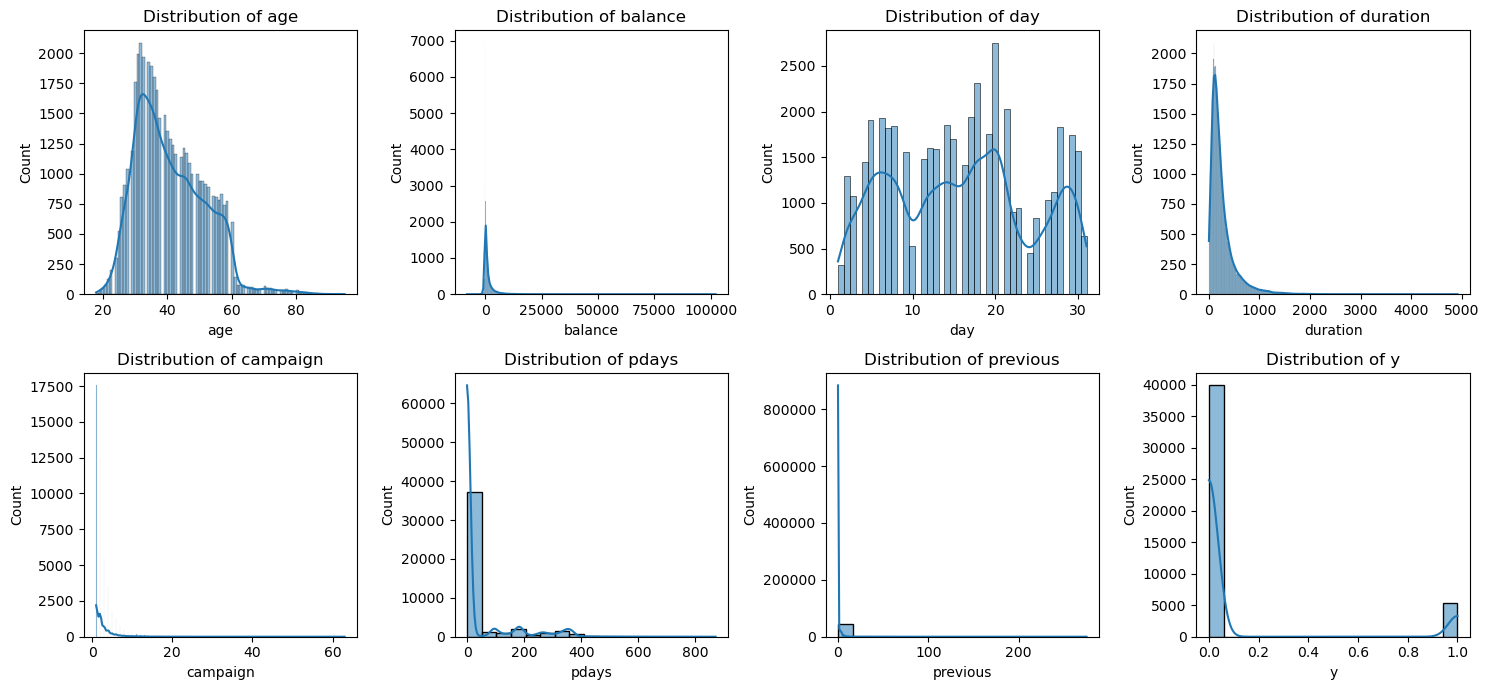

In [57]:
fig, axes = plt.subplots(2, 4, figsize=(15, 7))
axes = axes.flatten()
for i, col in enumerate(term_df.select_dtypes(include="number").columns):
    sns.histplot(term_df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

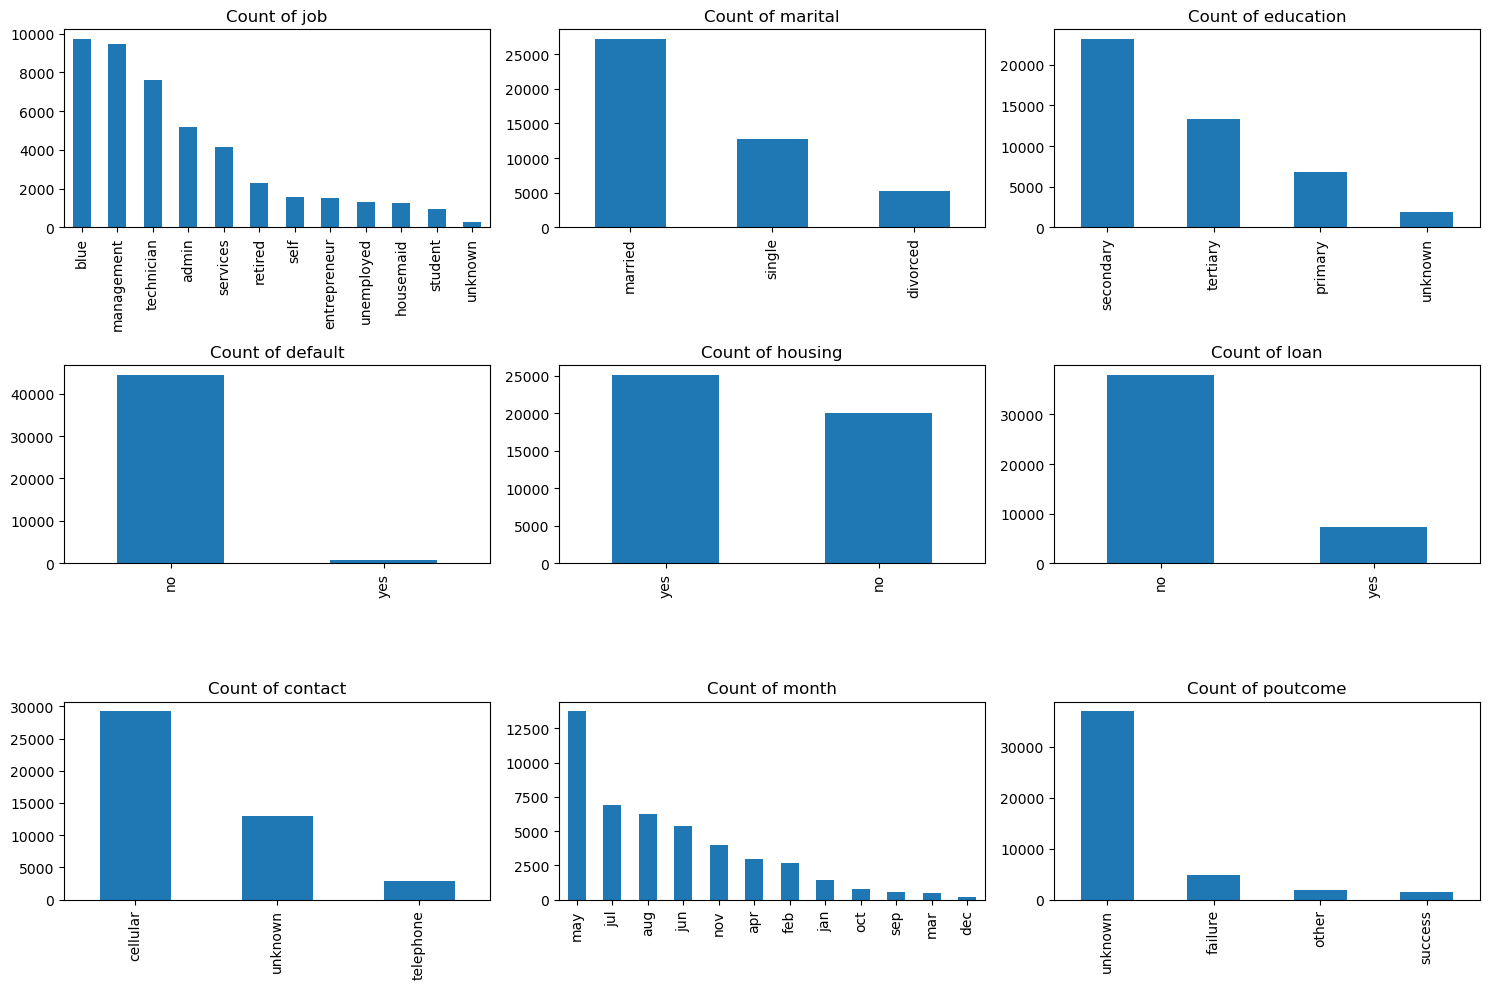

In [58]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()
for i,col in enumerate(term_df.select_dtypes(include="object").columns):
    term_df[col].value_counts(ascending = False).head(20).plot(kind = 'bar',ax=axes[i])
    #sns.countplot(credit_df[col], ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    #axes[i].tick_params(axis='x', rotation=45) 
plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='y'>

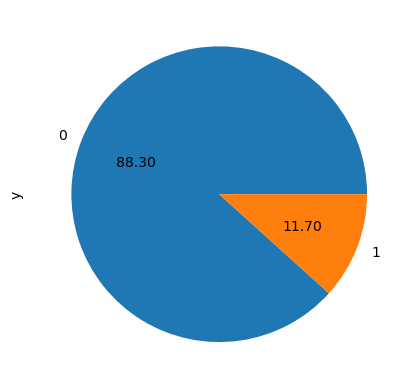

In [59]:
term_df['y'].value_counts().plot.pie(autopct='%.2f')

### Bivariate

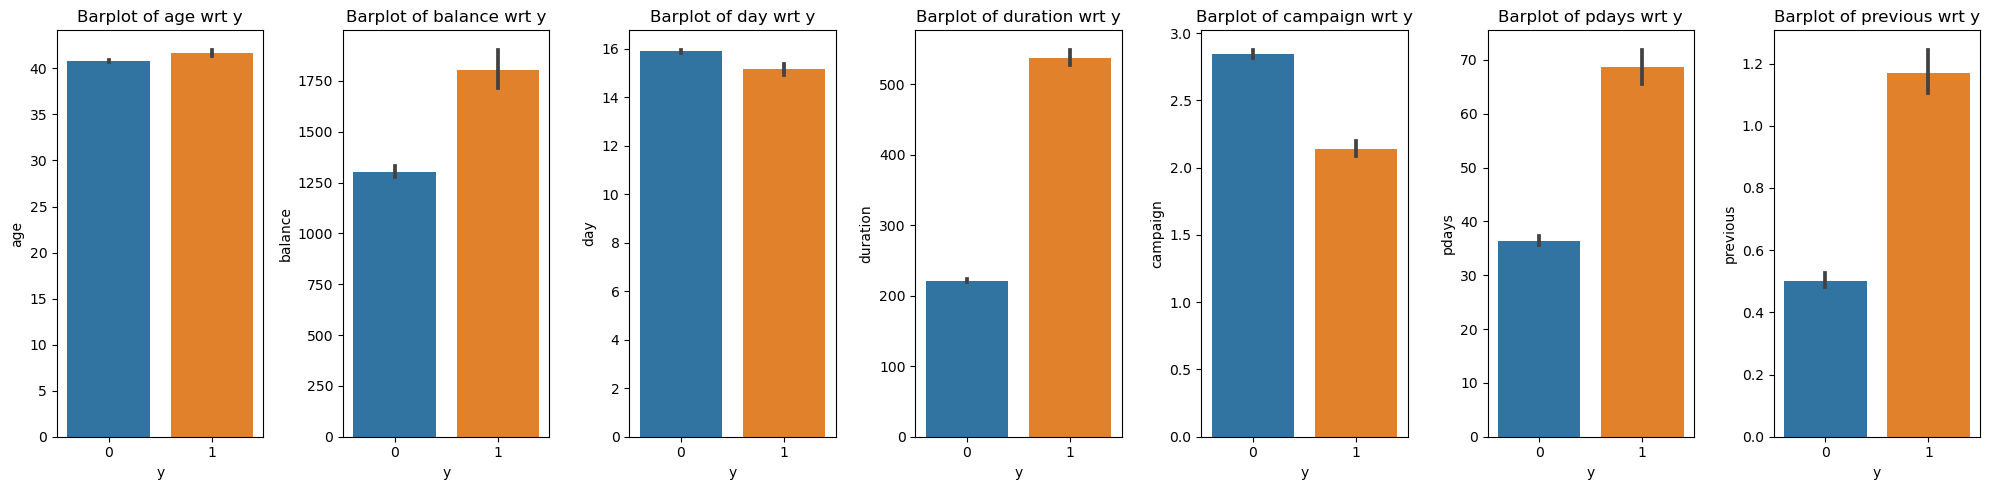

In [60]:
fig, axes = plt.subplots(1, 7, figsize=(20, 5))
axes = axes.flatten()
for i, col in enumerate(term_df.select_dtypes(include="number").columns):
    if col!="y":
        sns.barplot(data=term_df,x="y",y=col, ax=axes[i])
        axes[i].set_title(f'Barplot of {col} wrt y')
plt.tight_layout()
plt.show()

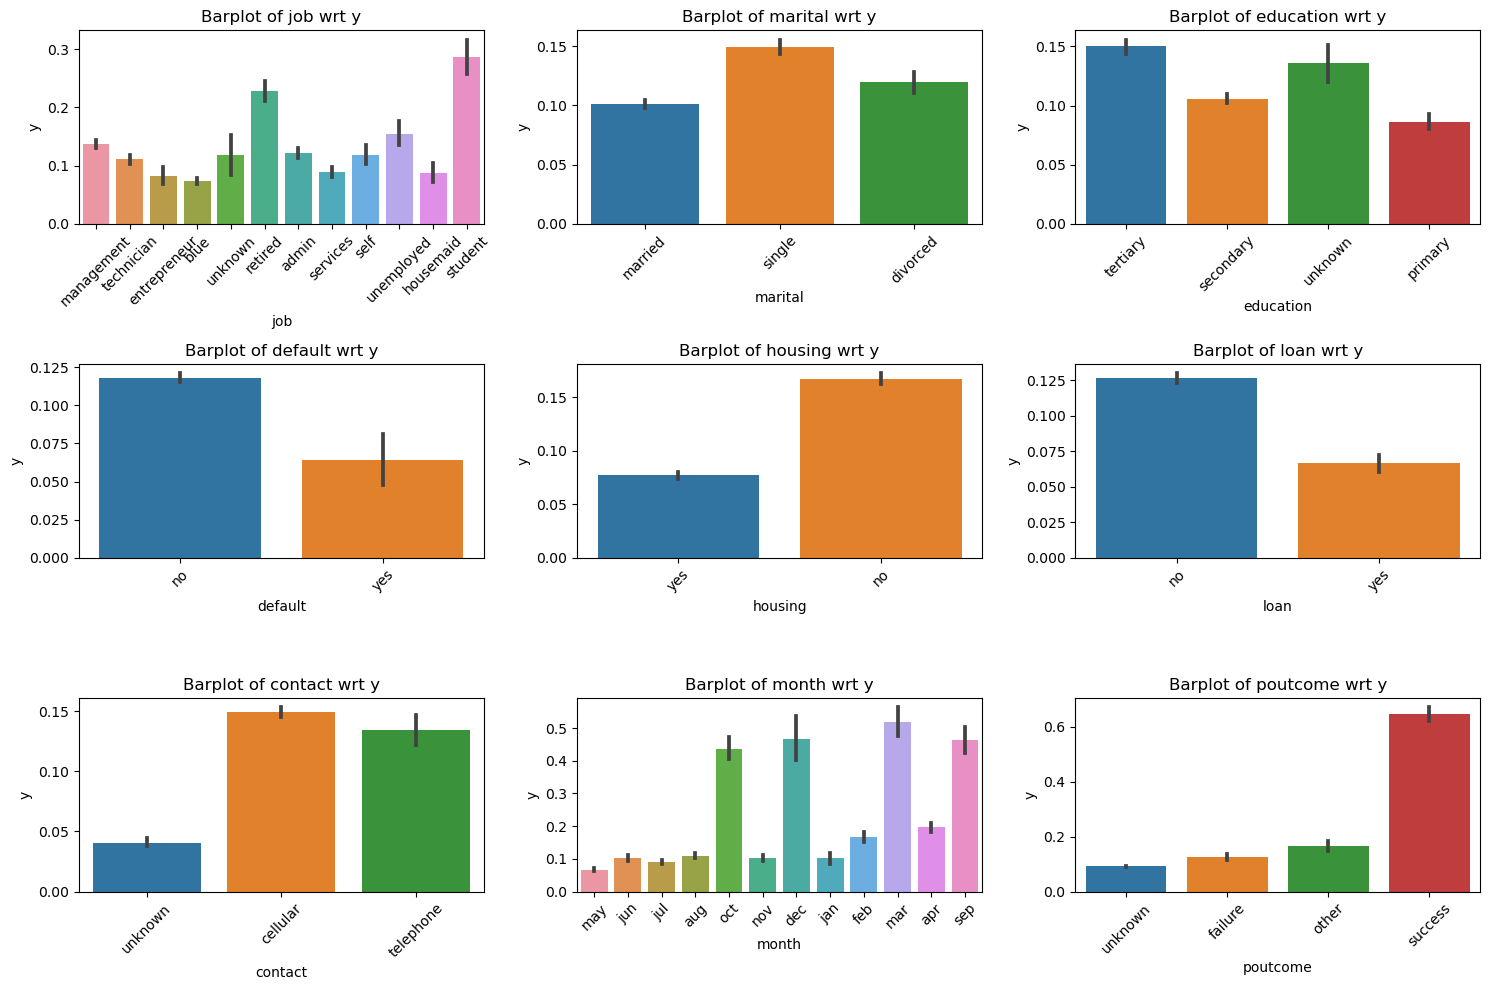

In [61]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(term_df.select_dtypes(include="object").columns):
    if col!="y":
        sns.barplot(data=term_df, y="y", x=col, ax=axes[i])
        axes[i].set_title(f'Barplot of {col} wrt y')
        axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

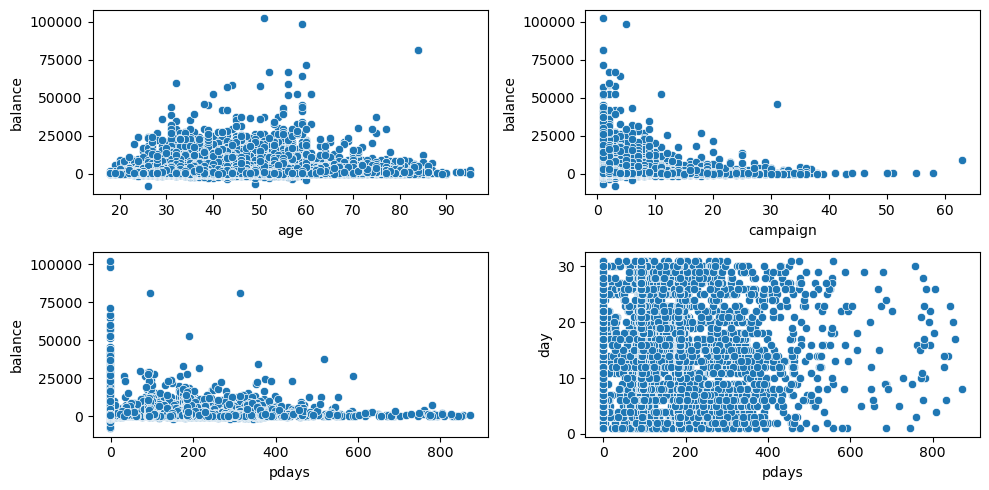

In [62]:
fig,axes=plt.subplots(2,2,figsize=(10,5))
axes = axes.flatten()
sns.scatterplot(data=term_df,x="age",y='balance',ax=axes[0])
sns.scatterplot(data=term_df,x="campaign",y='balance',ax=axes[1])
sns.scatterplot(data=term_df,x="pdays",y='balance',ax=axes[2])
sns.scatterplot(data=term_df,x="pdays",y='day',ax=axes[3])
plt.tight_layout()
plt.show()

### Multivariate

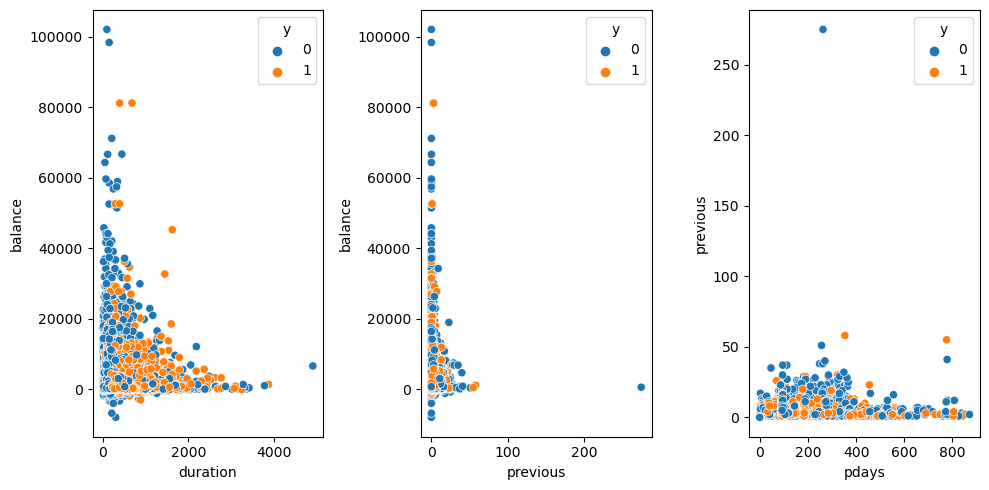

In [63]:
fig,axes=plt.subplots(1,3,figsize=(10,5))
axes = axes.flatten()
sns.scatterplot(data=term_df,x="duration",y='balance',ax=axes[0],hue='y')
sns.scatterplot(data=term_df,x="previous",y='balance',ax=axes[1],hue='y')
sns.scatterplot(data=term_df,x="pdays",y='previous',ax=axes[2],hue='y')
#sns.scatterplot(data=term_df,x="pdays",y='day',ax=axes[3],hue='y')
plt.tight_layout()
plt.show()

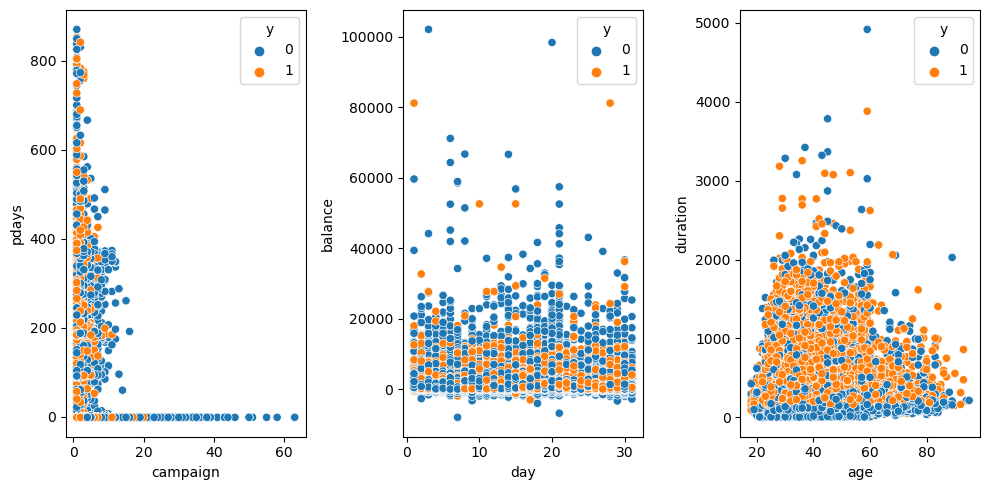

In [64]:
fig,axes=plt.subplots(1,3,figsize=(10,5))
axes = axes.flatten()
sns.scatterplot(data=term_df,x="campaign",y='pdays',ax=axes[0],hue='y')
sns.scatterplot(data=term_df,x="day",y='balance',ax=axes[1],hue='y')
sns.scatterplot(data=term_df,x="age",y='duration',ax=axes[2],hue='y')
#sns.scatterplot(data=term_df,x="pdays",y='day',ax=axes[3],hue='y')
plt.tight_layout()
plt.show()

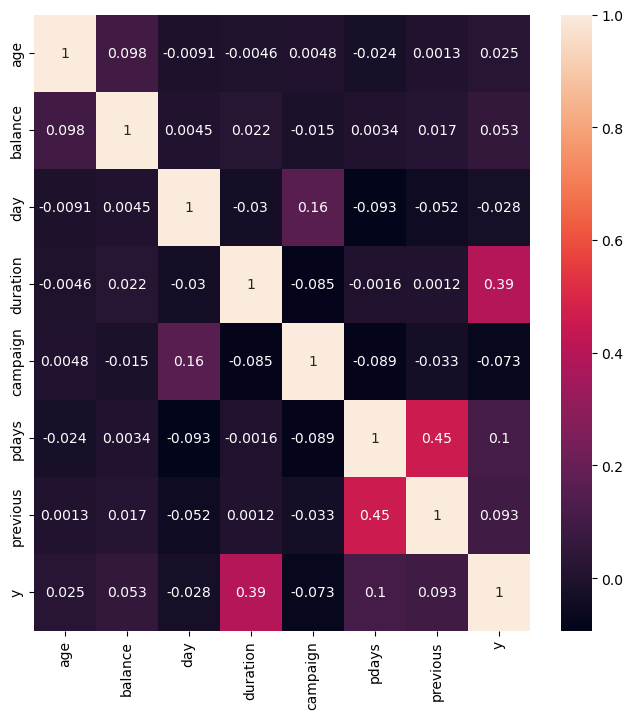

In [65]:
plt.figure(figsize=(8,8))
sns.heatmap(term_df.select_dtypes(include="number").corr(),annot=True)
plt.show()

### Outlier Detection

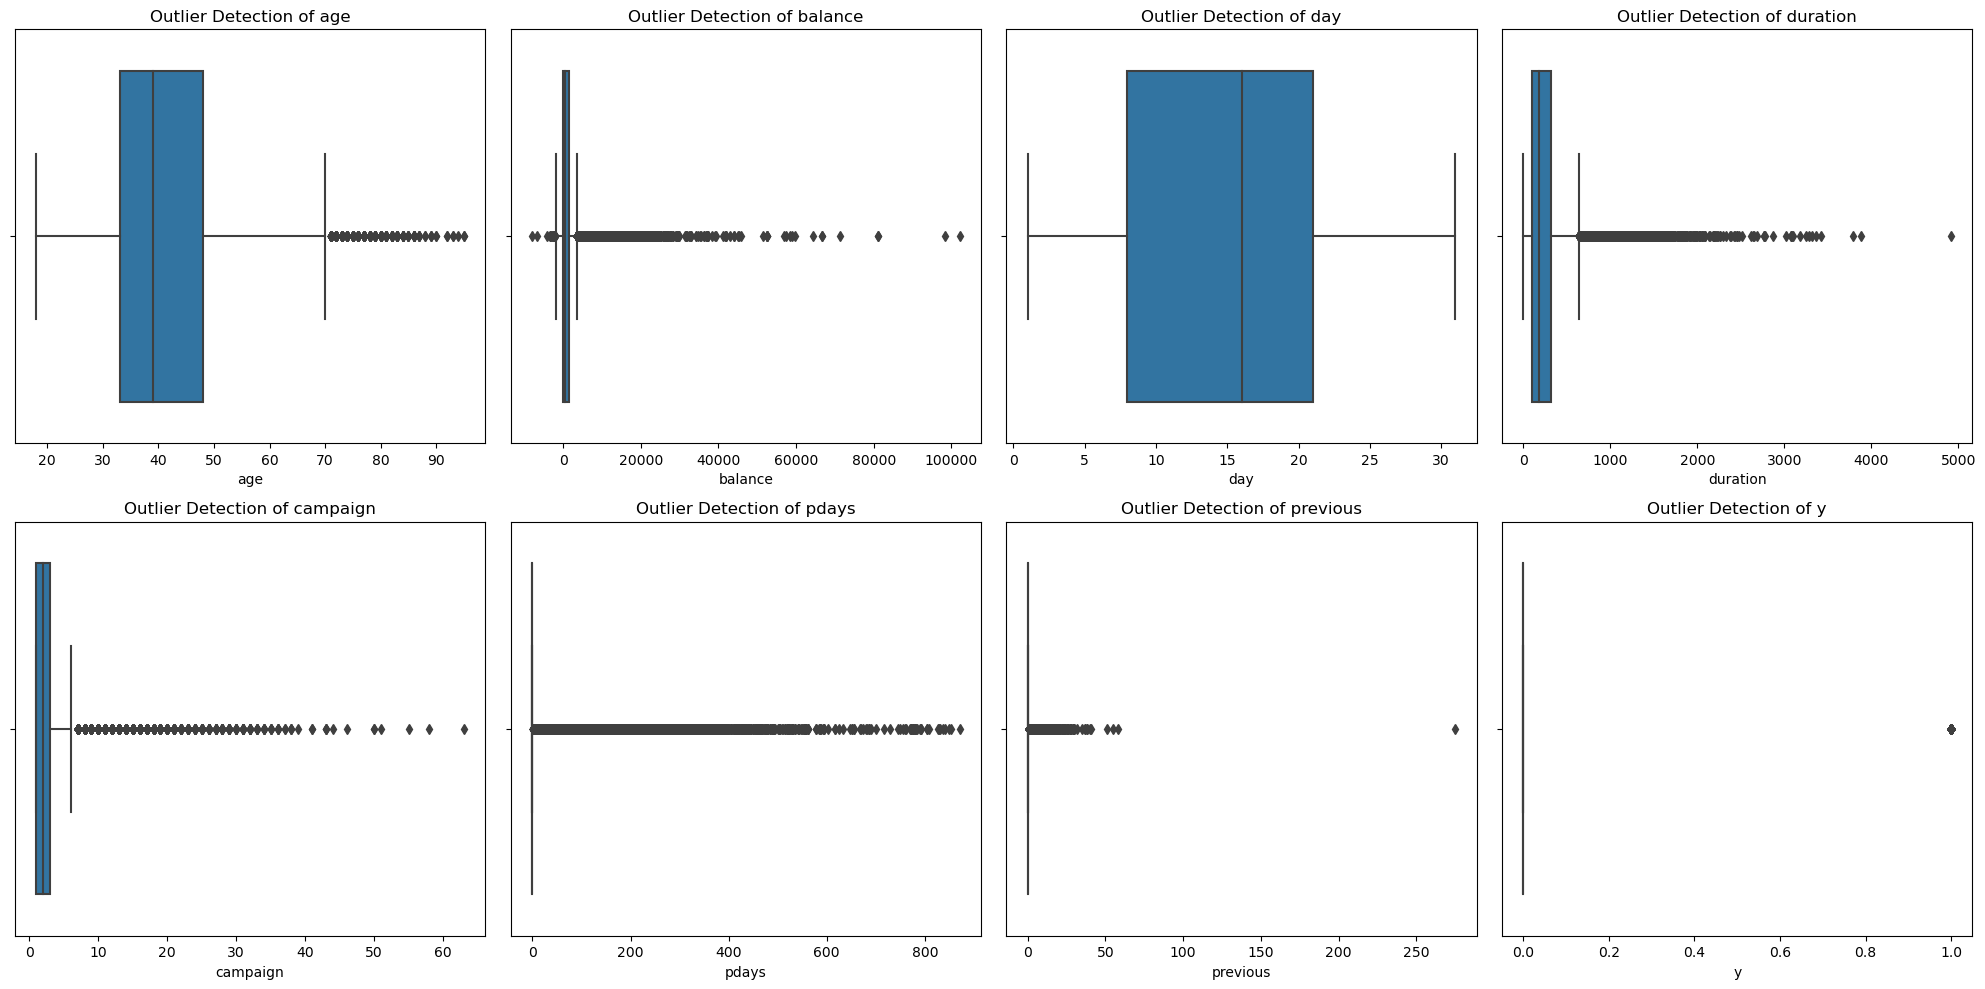

In [66]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for i, col in enumerate(term_df.select_dtypes(include="number").columns):
    sns.boxplot(term_df[col], ax=axes[i])
    axes[i].set_title(f'Outlier Detection of {col}')
plt.tight_layout()
plt.show()

### Preprocessing

In [3]:
term_df.drop(["pdays","previous"],axis=1,inplace=True)

# Feature Engineering

### Outlier Handling

In [4]:
def handle_outlier(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    l=q1-1.5*iqr
    u=q3+1.5*iqr
    df[col]=df[col].clip(l,u)

In [5]:
for col in term_df.select_dtypes(include="number").columns.drop("y"):
    #print(col)
    handle_outlier(term_df,col)

### Data Transformation

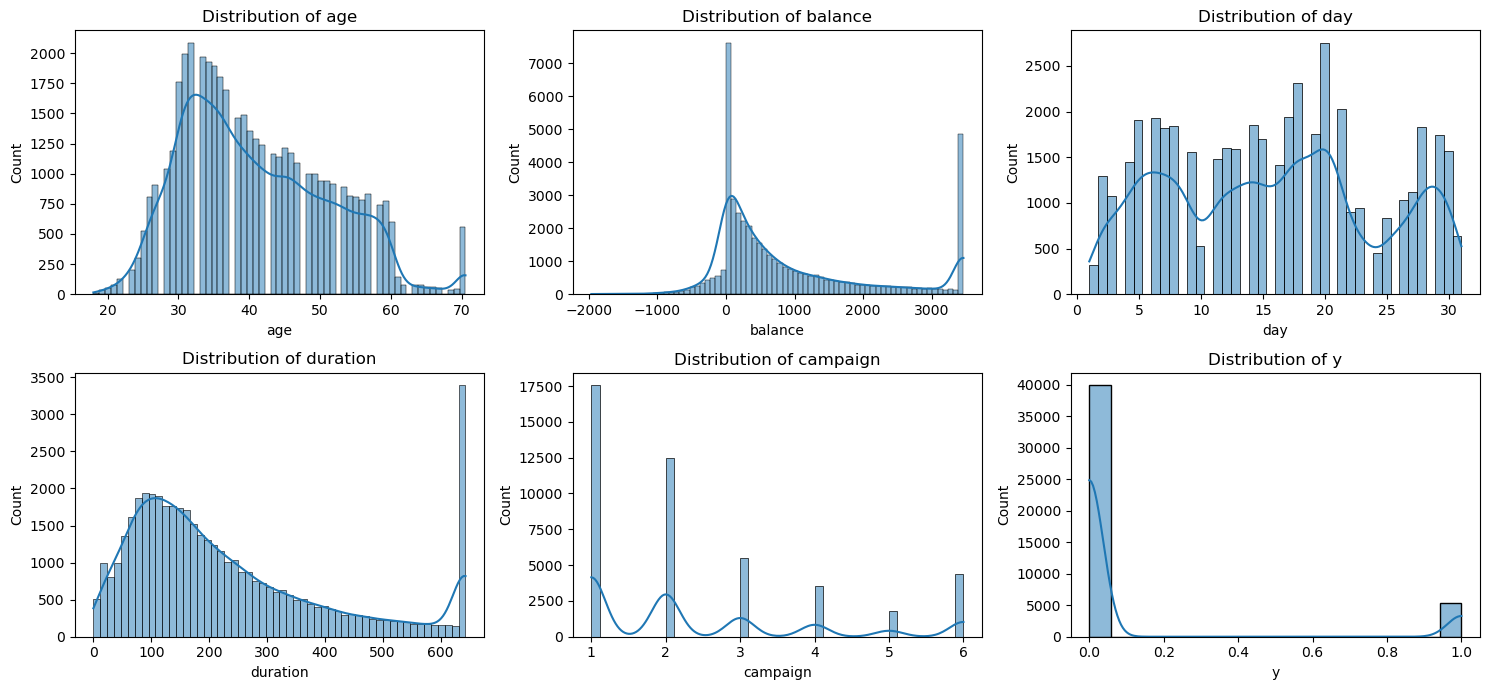

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 7))
axes = axes.flatten()
for i, col in enumerate(term_df.select_dtypes(include="number").columns):
    sns.histplot(term_df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

##### Right skew

In [6]:
term_df.select_dtypes(include="number").columns.drop(["y","campaign"])

Index(['age', 'balance', 'day', 'duration'], dtype='object')

In [6]:
pt=PowerTransformer(method="yeo-johnson")
quantile = QuantileTransformer(output_distribution='normal', random_state=0)

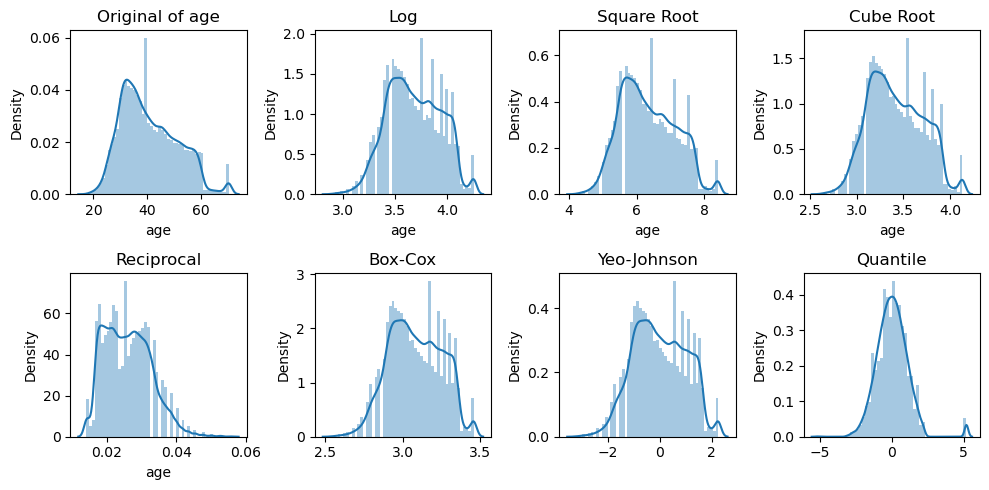

In [16]:
fig, axes = plt.subplots(2,4, figsize=(10, 5))
sns.distplot(term_df["age"],ax=axes[0,0]).set_title('Original of age')
sns.distplot(np.log(term_df["age"]+0.0001),ax=axes[0,1]).set_title('Log')
sns.distplot(np.sqrt(term_df["age"]),ax=axes[0,2]).set_title('Square Root')
sns.distplot(np.cbrt(term_df["age"]),ax=axes[0,3]).set_title('Cube Root')
sns.distplot(1/(term_df["age"]),ax=axes[1,0]).set_title('Reciprocal')
box_cox_dfz,_=stats.boxcox(term_df["age"]+1)
sns.distplot(box_cox_dfz,ax=axes[1,1]).set_title('Box-Cox')
yoe_dfz=pt.fit_transform(term_df[["age"]])
sns.distplot(yoe_dfz,ax=axes[1,2]).set_title('Yeo-Johnson')
quantile_dfz=quantile.fit_transform(pd.DataFrame(term_df["age"]))
sns.distplot(quantile_dfz,ax=axes[1,3]).set_title('Quantile')
plt.tight_layout()
plt.show()

In [6]:
term_df["age"]=1/(term_df["age"])

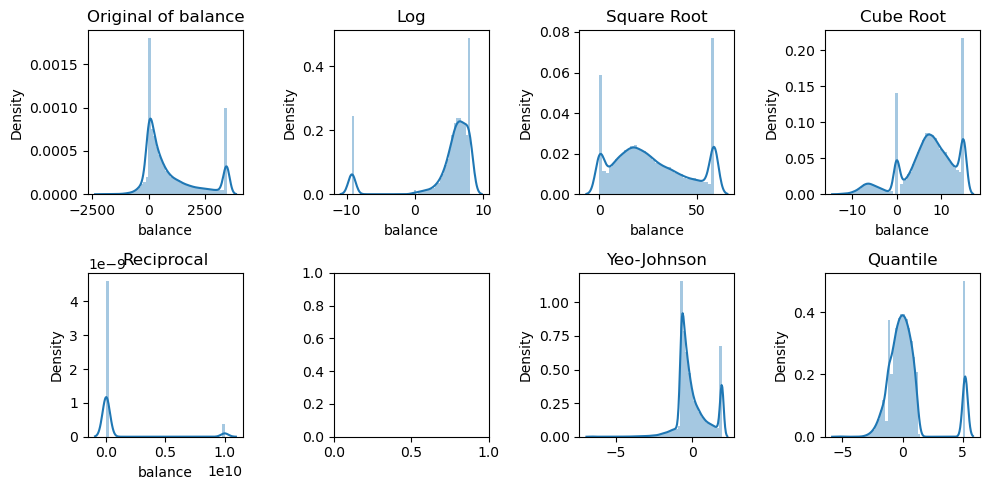

In [21]:
fig, axes = plt.subplots(2,4, figsize=(10, 5))
sns.distplot(term_df["balance"],ax=axes[0,0]).set_title('Original of balance')
sns.distplot(np.log(term_df["balance"]+0.0001),ax=axes[0,1]).set_title('Log')
sns.distplot(np.sqrt(term_df["balance"]),ax=axes[0,2]).set_title('Square Root')
sns.distplot(np.cbrt(term_df["balance"]),ax=axes[0,3]).set_title('Cube Root')
sns.distplot(1/(term_df["balance"]+ 1e-10),ax=axes[1,0]).set_title('Reciprocal')
#box_cox_dfz,_=stats.boxcox(term_df["balance"]+1)
#sns.distplot(box_cox_dfz,ax=axes[1,1]).set_title('Box-Cox')
yoe_dfz=pt.fit_transform(term_df[["balance"]])
sns.distplot(yoe_dfz,ax=axes[1,2]).set_title('Yeo-Johnson')
quantile_dfz=quantile.fit_transform(pd.DataFrame(term_df["balance"]))
sns.distplot(quantile_dfz,ax=axes[1,3]).set_title('Quantile')
plt.tight_layout()
plt.show()

In [7]:
term_df["balance"]=np.sqrt(term_df["balance"])

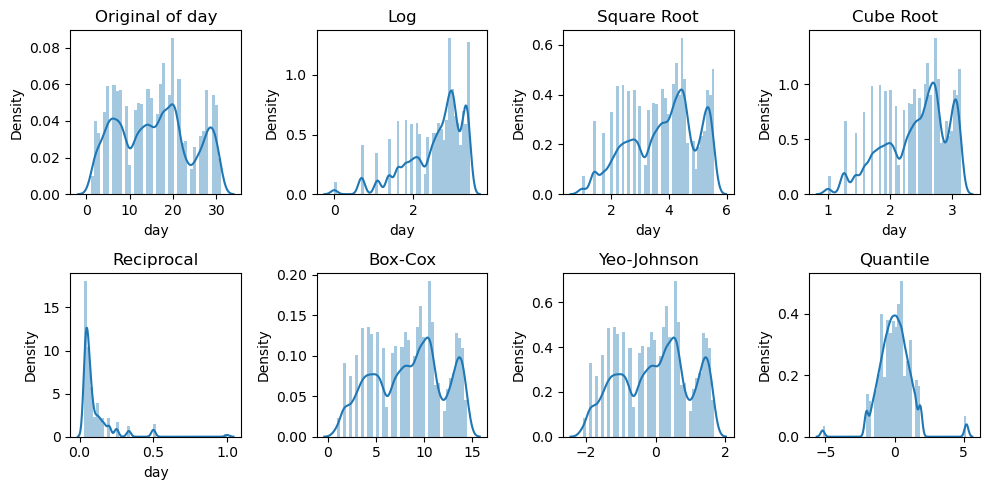

In [23]:
fig, axes = plt.subplots(2,4, figsize=(10, 5))
sns.distplot(term_df["day"],ax=axes[0,0]).set_title('Original of day')
sns.distplot(np.log(term_df["day"]+0.0001),ax=axes[0,1]).set_title('Log')
sns.distplot(np.sqrt(term_df["day"]),ax=axes[0,2]).set_title('Square Root')
sns.distplot(np.cbrt(term_df["day"]),ax=axes[0,3]).set_title('Cube Root')
sns.distplot(1/(term_df["day"]+ 1e-10),ax=axes[1,0]).set_title('Reciprocal')
box_cox_dfz,_=stats.boxcox(term_df["day"]+1)
sns.distplot(box_cox_dfz,ax=axes[1,1]).set_title('Box-Cox')
yoe_dfz=pt.fit_transform(term_df[["day"]])
sns.distplot(yoe_dfz,ax=axes[1,2]).set_title('Yeo-Johnson')
quantile_dfz=quantile.fit_transform(pd.DataFrame(term_df["day"]))
sns.distplot(quantile_dfz,ax=axes[1,3]).set_title('Quantile')
plt.tight_layout()
plt.show()

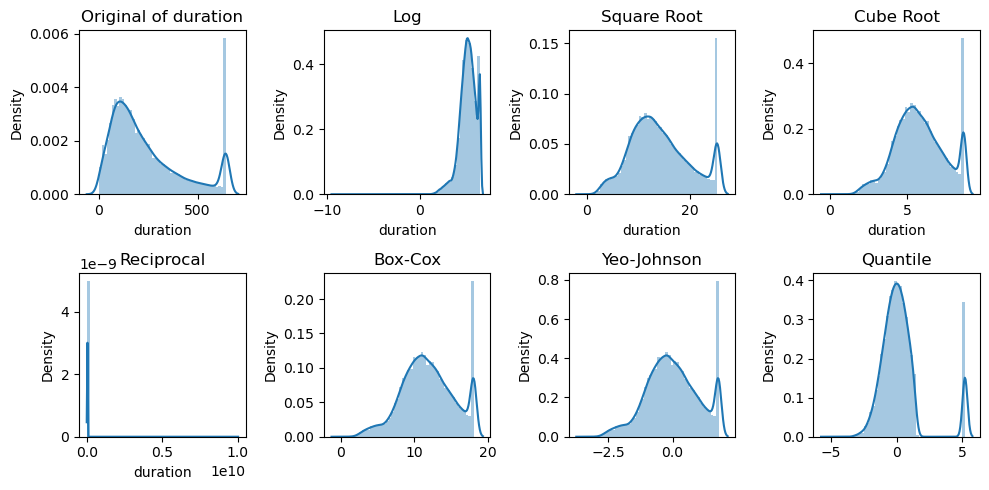

In [24]:
fig, axes = plt.subplots(2,4, figsize=(10, 5))
sns.distplot(term_df["duration"],ax=axes[0,0]).set_title('Original of duration')
sns.distplot(np.log(term_df["duration"]+0.0001),ax=axes[0,1]).set_title('Log')
sns.distplot(np.sqrt(term_df["duration"]),ax=axes[0,2]).set_title('Square Root')
sns.distplot(np.cbrt(term_df["duration"]),ax=axes[0,3]).set_title('Cube Root')
sns.distplot(1/(term_df["duration"]+ 1e-10),ax=axes[1,0]).set_title('Reciprocal')
box_cox_dfz,_=stats.boxcox(term_df["duration"]+1)
sns.distplot(box_cox_dfz,ax=axes[1,1]).set_title('Box-Cox')
yoe_dfz=pt.fit_transform(term_df[["duration"]])
sns.distplot(yoe_dfz,ax=axes[1,2]).set_title('Yeo-Johnson')
quantile_dfz=quantile.fit_transform(pd.DataFrame(term_df["duration"]))
sns.distplot(quantile_dfz,ax=axes[1,3]).set_title('Quantile')
plt.tight_layout()
plt.show()

In [8]:
term_df["duration"]=np.sqrt(term_df["duration"])

### Encoding

##### Label Encoding

In [9]:
le=LabelEncoder()
term_df["job"]=le.fit_transform(term_df[["job"]])
term_df["job"].unique()

array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8])

In [10]:
term_df["marital"]=le.fit_transform(term_df[["marital"]])
term_df["education"]=le.fit_transform(term_df[["education"]])
term_df["contact"]=le.fit_transform(term_df[["contact"]])
term_df["month"]=le.fit_transform(term_df[["month"]])

##### Ordinal Encoder

In [11]:
oe=OrdinalEncoder(categories=[['no','yes']])
term_df["housing"]=oe.fit_transform(term_df[["housing"]])
term_df["housing"].unique()

array([1., 0.])

In [12]:
oe=OrdinalEncoder(categories=[['no','yes']])
term_df["loan"]=oe.fit_transform(term_df[["loan"]])
term_df["loan"].unique()

array([0., 1.])

In [13]:
oe=OrdinalEncoder(categories=[['no','yes']])
term_df["default"]=oe.fit_transform(term_df[["default"]])
term_df["default"].unique()

array([0., 1.])

##### One Hot Encoder

In [14]:
ohe = OneHotEncoder(sparse=False, drop=None)
encoded_data = ohe.fit_transform(term_df[['poutcome']])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(['poutcome']))

# Concatenate the original DataFrame with the encoded DataFrame
#credit_df = pd.concat([credit_df, encoded_df], axis=1)
encoded_df.head()

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [15]:
term_df = pd.concat([term_df, encoded_df], axis=1)
term_df.drop(['poutcome'],axis=1,inplace=True)
term_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.017241,4,1,2,0.0,46.292548,1.0,0.0,2,5,8,16.155494,1.0,0,0.0,0.0,0.0,1.0
1,0.022727,9,2,1,0.0,5.385165,1.0,0.0,2,5,8,12.288206,1.0,0,0.0,0.0,0.0,1.0
2,0.030303,2,1,1,0.0,1.414214,1.0,1.0,2,5,8,8.717798,1.0,0,0.0,0.0,0.0,1.0
3,0.021277,1,1,3,0.0,38.807216,1.0,0.0,2,5,8,9.591663,1.0,0,0.0,0.0,0.0,1.0
4,0.030303,11,2,3,0.0,1.000000,0.0,0.0,2,5,8,14.071247,1.0,0,0.0,0.0,0.0,1.0


### Handle Missing values

In [16]:
knn_imputer = KNNImputer(n_neighbors=20)
term_df["balance"]=knn_imputer.fit_transform(term_df[["balance"]])

### Data Imbalance Handling

In [17]:
X=term_df.drop(['y'],axis=1)
y=term_df.y

##### SMOTE Method

In [18]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Feature Selection

In [19]:
def selector(func,X,y):
    selector = SelectKBest(score_func=func, k=15)
    X_resampled_selected = selector.fit_transform(X, y)
    selected_features_mask = selector.get_support()
    
    # Get the names of the selected features
    selected_feature_names = X.columns[selected_features_mask]
    
    # Convert the selected features to a DataFrame
    X_resampled_selected_df = pd.DataFrame(X_resampled_selected, columns=selected_feature_names)
    
    return X_resampled_selected_df

### Feature Selection using F Classifier (f_classif)

In [20]:
X_resampled_kbest_f_classif=selector(f_classif,X_resampled,y_resampled)
X_resampled_kbest_f_classif

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome_other,poutcome_success,poutcome_unknown
0,0.017241,1.0,2.0,0.0,46.292548,1.000000,0.0,2.0,5.0,8.0,16.155494,1.000000,0.0,0.0,1.0
1,0.022727,2.0,1.0,0.0,5.385165,1.000000,0.0,2.0,5.0,8.0,12.288206,1.000000,0.0,0.0,1.0
2,0.030303,1.0,1.0,0.0,1.414214,1.000000,1.0,2.0,5.0,8.0,8.717798,1.000000,0.0,0.0,1.0
3,0.021277,1.0,3.0,0.0,38.807216,1.000000,0.0,2.0,5.0,8.0,9.591663,1.000000,0.0,0.0,1.0
4,0.030303,2.0,3.0,0.0,1.000000,0.000000,0.0,2.0,5.0,8.0,14.071247,1.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,0.037986,1.0,1.0,0.0,41.695742,0.000000,0.0,0.0,8.0,11.0,16.240228,1.000000,0.0,1.0,0.0
79840,0.032676,1.0,1.0,0.0,8.522279,1.000000,0.0,1.0,8.0,8.0,25.357445,1.902517,0.0,0.0,1.0
79841,0.033590,2.0,0.0,0.0,14.857474,1.000000,0.0,2.0,6.0,6.0,25.357445,5.329330,0.0,0.0,1.0
79842,0.022926,1.0,0.0,0.0,21.038313,1.000000,0.0,0.0,19.0,8.0,25.357445,1.994723,0.0,0.0,1.0


### Feature Selection using Mutual Information Classifier (mutual_info_classif)

In [21]:
X_resampled_kbest_mic=selector(mutual_info_classif,X_resampled,y_resampled)
X_resampled_kbest_mic

,age,job,marital,balance,housing,loan,contact,day,month,duration,campaign,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.017241,4.0,1.0,46.292548,1.000000,0.0,2.0,5.0,8.0,16.155494,1.000000,0.0,0.0,0.0,1.0
1,0.022727,9.0,2.0,5.385165,1.000000,0.0,2.0,5.0,8.0,12.288206,1.000000,0.0,0.0,0.0,1.0
2,0.030303,2.0,1.0,1.414214,1.000000,1.0,2.0,5.0,8.0,8.717798,1.000000,0.0,0.0,0.0,1.0
3,0.021277,1.0,1.0,38.807216,1.000000,0.0,2.0,5.0,8.0,9.591663,1.000000,0.0,0.0,0.0,1.0
4,0.030303,11.0,2.0,1.000000,0.000000,0.0,2.0,5.0,8.0,14.071247,1.000000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,0.037986,0.0,1.0,41.695742,0.000000,0.0,0.0,8.0,11.0,16.240228,1.000000,0.0,0.0,1.0,0.0
79840,0.032676,1.0,1.0,8.522279,1.000000,0.0,1.0,8.0,8.0,25.357445,1.902517,0.0,0.0,0.0,1.0
79841,0.033590,0.0,2.0,14.857474,1.000000,0.0,2.0,6.0,6.0,25.357445,5.329330,0.0,0.0,0.0,1.0
79842,0.022926,1.0,1.0,21.038313,1.000000,0.0,0.0,19.0,8.0,25.357445,1.994723,0.0,0.0,0.0,1.0


### Feature Selection using Variance Threshold (VarianceThreshold)

In [22]:
selector_vt = VarianceThreshold(threshold=0.1)  # Example threshold
X_resampled_kbest_vt = selector_vt.fit_transform(X_resampled)
selected_features_mask_vt = selector_vt.get_support()
selected_features_vt = X_resampled.columns[selected_features_mask_vt]
X_resampled_vt_df_1 = pd.DataFrame(X_resampled[selected_features_vt])
X_resampled_vt_df_1

,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome_unknown
0,4,1,2,46.292548,1.000000,0.0,2,5,8,16.155494,1.000000,1.0
1,9,2,1,5.385165,1.000000,0.0,2,5,8,12.288206,1.000000,1.0
2,2,1,1,1.414214,1.000000,1.0,2,5,8,8.717798,1.000000,1.0
3,1,1,3,38.807216,1.000000,0.0,2,5,8,9.591663,1.000000,1.0
4,11,2,3,1.000000,0.000000,0.0,2,5,8,14.071247,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
79839,0,1,1,41.695742,0.000000,0.0,0,8,11,16.240228,1.000000,0.0
79840,1,1,1,8.522279,1.000000,0.0,1,8,8,25.357445,1.902517,1.0
79841,0,2,0,14.857474,1.000000,0.0,2,6,6,25.357445,5.329330,1.0
79842,1,1,0,21.038313,1.000000,0.0,0,19,8,25.357445,1.994723,1.0


### Feature Selection using Recursive Feature Elimination (RFE)

In [23]:
model = RandomForestClassifier(random_state=42)
selector = RFE(model, n_features_to_select=15)
selector.fit_transform(X_resampled, y_resampled)
selected_features_mask = selector.support_
selected_features = X_resampled.columns[selected_features_mask]
X_resampled_rfe_df_1 = pd.DataFrame(X_resampled[selected_features])
X_resampled_rfe_df_1

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome_failure,poutcome_success,poutcome_unknown
0,0.017241,4,1,2,46.292548,1.000000,0.0,2,5,8,16.155494,1.000000,0.0,0.0,1.0
1,0.022727,9,2,1,5.385165,1.000000,0.0,2,5,8,12.288206,1.000000,0.0,0.0,1.0
2,0.030303,2,1,1,1.414214,1.000000,1.0,2,5,8,8.717798,1.000000,0.0,0.0,1.0
3,0.021277,1,1,3,38.807216,1.000000,0.0,2,5,8,9.591663,1.000000,0.0,0.0,1.0
4,0.030303,11,2,3,1.000000,0.000000,0.0,2,5,8,14.071247,1.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,0.037986,0,1,1,41.695742,0.000000,0.0,0,8,11,16.240228,1.000000,0.0,1.0,0.0
79840,0.032676,1,1,1,8.522279,1.000000,0.0,1,8,8,25.357445,1.902517,0.0,0.0,1.0
79841,0.033590,0,2,0,14.857474,1.000000,0.0,2,6,6,25.357445,5.329330,0.0,0.0,1.0
79842,0.022926,1,1,0,21.038313,1.000000,0.0,0,19,8,25.357445,1.994723,0.0,0.0,1.0


# Splitting

### Splitting for Features Selected using F Classifier (f_classif)

In [24]:
X_train_f_classif,X_test_f_classif,y_train_f_classif,y_test_f_classif=train_test_split(X_resampled_kbest_f_classif,y_resampled,random_state=42,test_size=0.2)

### Splitting for Features Selected using Mutual Information Classifier (mutual_info_classif)

In [25]:
X_train_mic,X_test_mic,y_train_mic,y_test_mic=train_test_split(X_resampled_kbest_mic,y_resampled,random_state=42,test_size=0.2)

### Splitting for Features Selected using Variance Threshold (VarianceThreshold)

In [26]:
X_train_vt,X_test_vt,y_train_vt,y_test_vt=train_test_split(X_resampled_vt_df_1,y_resampled,random_state=42,test_size=0.2)

### Splitting for Features Selected using Recursive Feature Elimination (RFE)

In [27]:
X_train_rfe,X_test_rfe,y_train_rfe,y_test_rfe=train_test_split(X_resampled_rfe_df_1,y_resampled,random_state=42,test_size=0.2)

# Scaling

In [28]:
minmax=MinMaxScaler()

### Scaling for Features Selected using F Classifier (f_classif)

In [29]:
X_train_f_classif_scale=minmax.fit_transform(X_train_f_classif)
X_test_f_classif_scale=minmax.transform(X_test_f_classif)
X_train_f_classif_scale

array([[0.45609896, 0.        , 0.33333333, ..., 0.        , 0.01706486,
        0.98293514],
       [0.14057143, 0.5       , 0.66666667, ..., 0.        , 0.        ,
        1.        ],
       [0.04700461, 0.5       , 0.66666667, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.40519711, 0.5       , 0.66666667, ..., 0.        , 0.        ,
        1.        ],
       [0.38961039, 0.5       , 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       [0.29323308, 0.5       , 0.        , ..., 0.        , 0.        ,
        1.        ]])

### Scaling for Features Selected using Mutual Information Classifier (mutual_info_classif)

In [30]:
X_train_mic_scale=minmax.fit_transform(X_train_mic)
X_test_mic_scale=minmax.transform(X_test_mic)
X_train_mic_scale

array([[0.45609896, 0.45454545, 0.        , ..., 0.        , 0.01706486,
        0.98293514],
       [0.14057143, 0.45454545, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.04700461, 0.36363636, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.40519711, 0.36363636, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.38961039, 0.45454545, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.29323308, 0.09090909, 0.5       , ..., 0.        , 0.        ,
        1.        ]])

### Scaling for Features Selected using Variance Threshold (VarianceThreshold)

In [31]:
X_train_vt_scale=minmax.fit_transform(X_train_vt)
X_test_vt_scale=minmax.transform(X_test_vt)
X_train_vt_scale

array([[0.45454545, 0.        , 0.33333333, ..., 1.        , 1.        ,
        0.98293514],
       [0.45454545, 0.5       , 0.66666667, ..., 0.3227988 , 0.        ,
        1.        ],
       [0.36363636, 0.5       , 0.66666667, ..., 0.34829065, 0.4       ,
        1.        ],
       ...,
       [0.36363636, 0.5       , 0.66666667, ..., 0.58830025, 0.35488209,
        1.        ],
       [0.45454545, 0.5       , 0.33333333, ..., 0.41548563, 0.        ,
        1.        ],
       [0.09090909, 0.5       , 0.        , ..., 0.32519883, 1.        ,
        1.        ]])

### Scaling for Features Selected using Recursive Feature Elimination (RFE)

In [32]:
X_train_rfe_scale=minmax.fit_transform(X_train_rfe)
X_test_rfe_scale=minmax.transform(X_test_rfe)
X_train_rfe_scale

array([[0.45609896, 0.45454545, 0.        , ..., 0.        , 0.01706486,
        0.98293514],
       [0.14057143, 0.45454545, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.04700461, 0.36363636, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.40519711, 0.36363636, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.38961039, 0.45454545, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.29323308, 0.09090909, 0.5       , ..., 0.        , 0.        ,
        1.        ]])

# Model Training and Evaluation

### Logistic Regression

In [65]:
lr=LogisticRegression()

##### f_classifier

In [87]:
lr.fit(X_train_f_classif_scale,y_train_f_classif)
y_test_pred_lr_1=lr.predict(X_test_f_classif_scale)
y_test_pred_lr_1

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [88]:
print("Accuracy for test set: ",accuracy_score(y_test_f_classif,y_test_pred_lr_1))
print("Precision for test set: ",precision_score(y_test_f_classif,y_test_pred_lr_1))
print("Recall for test set: ",recall_score(y_test_f_classif,y_test_pred_lr_1))
print("F1 score for test set: ",f1_score(y_test_f_classif,y_test_pred_lr_1))
print("Confusion matrix: ",confusion_matrix(y_test_f_classif,y_test_pred_lr_1))

Accuracy for test set:  0.826914647128812
Precision for test set:  0.8238962944845297
Recall for test set:  0.835752388041186
F1 score for test set:  0.8297819928562631
Confusion matrix:  [[6468 1440]
 [1324 6737]]


In [89]:
y_train_pred_lr_1=lr.predict(X_train_f_classif_scale)
print("Accuracy for train set: ",accuracy_score(y_train_f_classif,y_train_pred_lr_1))

Accuracy for train set:  0.8324853228962819


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

### Hyperparameter tuning using RandomizedSearchCV

In [254]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],'C': np.arange(0.01,1,0.5),#'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': np.arange(100,1000,50),'tol': [1e-4, 1e-3, 1e-2],#'class_weight': ['balanced', None]
}

In [255]:
random_search = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv=5, scoring='accuracy', n_iter=100, n_jobs=-1, random_state=42)
random_search.fit(X_train_f_classif_scale,y_train_f_classif)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([0.01, 0.51]),
                                        'max_iter': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'tol': [0.0001, 0.001, 0.01]},
                   random_state=42, scoring='accuracy')

In [256]:
best_lr_random = random_search.best_estimator_
# Predict on the test set
y_test_pred_lr_1_rcv_1 = best_lr_random.predict(X_test_f_classif_scale)
y_test_pred_lr_1_rcv_1

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [257]:
print("Best Parameters: ", random_search.best_params_)
print("Accuracy Score: ", accuracy_score(y_test_f_classif, y_test_pred_lr_1_rcv_1))

Best Parameters:  {'tol': 0.001, 'penalty': 'l2', 'max_iter': 950, 'C': 0.51}
Accuracy Score:  0.826914647128812


In [258]:
y_train_pred_lr_1_rcv_1 = best_lr_random.predict(X_train_f_classif_scale)
print("Best Parameters: ", random_search.best_params_)
print("accuracy Score for train set: ", accuracy_score(y_train_f_classif, y_train_pred_lr_1_rcv_1))

Best Parameters:  {'tol': 0.001, 'penalty': 'l2', 'max_iter': 950, 'C': 0.51}
accuracy Score for train set:  0.8324853228962819


##### mutual_info_classifier

In [104]:
lr.fit(X_train_mic_scale,y_train_mic)
y_test_pred_lr_2=lr.predict(X_test_mic_scale)
y_test_pred_lr_2

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [105]:
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_lr_2))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_lr_2))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_lr_2))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_lr_2))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_lr_2))

Accuracy for test set:  0.8258500845387939
Precision for test set:  0.8235294117647058
Recall for test set:  0.8336434685522888
F1 score for test set:  0.8285555761050489
Confusion matrix:  [[6468 1440]
 [1341 6720]]


In [106]:
y_train_pred_lr_2=lr.predict(X_train_mic_scale)
print("Accuracy for train set: ",accuracy_score(y_train_mic,y_train_pred_lr_2))

Accuracy for train set:  0.8320626223091977


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

### Hyperparameter tuning using RandomizedSearchCV

In [275]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None], 'C': np.arange(0.01,1,0.5),'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': np.arange(100,1000,50),'tol': [1e-4, 1e-3, 1e-2],'class_weight': ['balanced', None],
}

In [276]:
random_search = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv=5, scoring='accuracy', n_iter=100, n_jobs=-1, random_state=42)
random_search.fit(X_train_mic_scale,y_train_mic)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([0.01, 0.51]),
                                        'class_weight': ['balanced', None],
                                        'max_iter': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag', 'saga'],
                                        'tol': [0.0001, 0.001, 0.01]},
                   random_state=42, scoring='accuracy')

In [277]:
best_lr_random = random_search.best_estimator_
# Predict on the test set
y_test_pred_lr_2_rcv_2 = best_lr_random.predict(X_test_mic_scale)
y_test_pred_lr_2_rcv_2

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [278]:
print("Best Parameters: ", random_search.best_params_)
print("Accuracy Score: ", accuracy_score(y_test_mic, y_test_pred_lr_2_rcv_2))

Best Parameters:  {'tol': 0.0001, 'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 200, 'class_weight': 'balanced', 'C': 0.51}
Accuracy Score:  0.8262258125117415


In [279]:
y_train_pred_lr_2_rcv_2 = best_lr_random.predict(X_train_mic_scale)
print("Best Parameters: ", random_search.best_params_)
print("accuracy Score for train set: ", accuracy_score(y_train_mic, y_train_pred_lr_2_rcv_2))

Best Parameters:  {'tol': 0.0001, 'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 200, 'class_weight': 'balanced', 'C': 0.51}
accuracy Score for train set:  0.8319373776908023


##### Variance Threshold

In [134]:
lr.fit(X_train_vt_scale,y_train_vt)
y_test_pred_lr_3=lr.predict(X_test_vt_scale)
y_test_pred_lr_3

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [135]:
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_lr_3))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_lr_3))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_lr_3))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_lr_3))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_lr_3))

Accuracy for test set:  0.8133258187738743
Precision for test set:  0.8052150925258351
Recall for test set:  0.8312864408882272
F1 score for test set:  0.818043093450528
Confusion matrix:  [[6287 1621]
 [1360 6701]]


In [136]:
y_train_pred_lr_3=lr.predict(X_train_vt_scale)
print("Accuracy for train set: ",accuracy_score(y_train_vt,y_train_pred_lr_3))

Accuracy for train set:  0.8177534246575342


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

### Hyperparameter tuning using RandomizedSearchCV

In [280]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None], 'C': np.arange(0.01,1,0.5),'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': np.arange(100,1000,50),'tol': [1e-4, 1e-3, 1e-2],'class_weight': ['balanced', None],
}

In [286]:
random_search = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv=5, scoring='accuracy', n_iter=100, n_jobs=-1, random_state=42)
random_search.fit(X_train_vt_scale,y_train_vt)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([0.01, 0.51]),
                                        'class_weight': ['balanced', None],
                                        'max_iter': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag', 'saga'],
                                        'tol': [0.0001, 0.001, 0.01]},
                   random_state=42, scoring='accuracy')

In [287]:
best_lr_random = random_search.best_estimator_
# Predict on the test set
y_test_pred_lr_3_rcv_2 = best_lr_random.predict(X_test_vt_scale)
y_test_pred_lr_3_rcv_2

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [288]:
print("Best Parameters: ", random_search.best_params_)
print("Accuracy Score: ", accuracy_score(y_test_vt, y_test_pred_lr_3_rcv_2))

Best Parameters:  {'tol': 0.01, 'solver': 'saga', 'penalty': 'l1', 'max_iter': 350, 'class_weight': 'balanced', 'C': 0.01}
Accuracy Score:  0.8134510614315236


In [289]:
y_train_pred_lr_3_rcv_2 = best_lr_random.predict(X_train_vt_scale)
print("Best Parameters: ", random_search.best_params_)
print("accuracy Score for train set: ", accuracy_score(y_train_vt, y_train_pred_lr_3_rcv_2))

Best Parameters:  {'tol': 0.01, 'solver': 'saga', 'penalty': 'l1', 'max_iter': 350, 'class_weight': 'balanced', 'C': 0.01}
accuracy Score for train set:  0.8183953033268102


##### Recursive Feature Elimination

In [149]:
lr.fit(X_train_rfe_scale,y_train_rfe)
y_test_pred_lr_4=lr.predict(X_test_rfe_scale)
y_test_pred_lr_4

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [150]:
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_lr_4))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_lr_4))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_lr_4))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_lr_4))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_lr_4))

Accuracy for test set:  0.8264762978270399
Precision for test set:  0.8239833414992651
Recall for test set:  0.8345118471653641
F1 score for test set:  0.8292141756548537
Confusion matrix:  [[6471 1437]
 [1334 6727]]


In [151]:
y_train_pred_lr_4=lr.predict(X_train_rfe_scale)
print("Accuracy for train set: ",accuracy_score(y_train_rfe,y_train_pred_lr_4))

Accuracy for train set:  0.8321095890410959


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

### Hyperparameter tuning using RandomizedSearchCV

In [290]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None], 'C': np.arange(0.01,1,0.5),'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': np.arange(100,1000,50),'tol': [1e-4, 1e-3, 1e-2],'class_weight': ['balanced', None],
}

In [291]:
random_search = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv=5, scoring='accuracy', n_iter=100, n_jobs=-1, random_state=42)
random_search.fit(X_train_rfe_scale,y_train_mic)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([0.01, 0.51]),
                                        'class_weight': ['balanced', None],
                                        'max_iter': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag', 'saga'],
                                        'tol': [0.0001, 0.001, 0.01]},
                   random_state=42, scoring='accuracy')

In [292]:
best_lr_random = random_search.best_estimator_
# Predict on the test set
y_test_pred_lr_4_rcv_2 = best_lr_random.predict(X_test_rfe_scale)
y_test_pred_lr_4_rcv_2

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [293]:
print("Best Parameters: ", random_search.best_params_)
print("Accuracy Score: ", accuracy_score(y_test_rfe, y_test_pred_lr_4_rcv_2))

Best Parameters:  {'tol': 0.0001, 'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 200, 'class_weight': 'balanced', 'C': 0.51}
Accuracy Score:  0.8264762978270399


In [294]:
y_train_pred_lr_4_rcv_2 = best_lr_random.predict(X_train_rfe_scale)
print("Best Parameters: ", random_search.best_params_)
print("accuracy Score for train set: ", accuracy_score(y_train_rfe, y_train_pred_lr_4_rcv_2))

Best Parameters:  {'tol': 0.0001, 'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 200, 'class_weight': 'balanced', 'C': 0.51}
accuracy Score for train set:  0.83226614481409


### Decision Tree Classifier

In [33]:
dtc=DecisionTreeClassifier()

##### f_classifier

In [34]:
dtc.fit(X_train_f_classif_scale,y_train_f_classif)
y_test_pred_dtc_1=dtc.predict(X_test_f_classif_scale)
y_test_pred_dtc_1

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [35]:
print("Accuracy for test set: ",accuracy_score(y_test_f_classif,y_test_pred_dtc_1))
print("Precision for test set: ",precision_score(y_test_f_classif,y_test_pred_dtc_1))
print("Recall for test set: ",recall_score(y_test_f_classif,y_test_pred_dtc_1))
print("F1 score for test set: ",f1_score(y_test_f_classif,y_test_pred_dtc_1))
print("Confusion matrix: ",confusion_matrix(y_test_f_classif,y_test_pred_dtc_1))

Accuracy for test set:  0.9148349927985472
Precision for test set:  0.9114576937246714
Recall for test set:  0.9207294380349833
F1 score for test set:  0.9160701061466305
Confusion matrix:  [[7187  721]
 [ 639 7422]]


In [36]:
y_train_pred_dtc_1=dtc.predict(X_train_f_classif_scale)
print("Accuracy for train set: ",accuracy_score(y_train_f_classif,y_train_pred_dtc_1))

Accuracy for train set:  0.9999843444227006


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

### Hyperparameter tuning using RandomizedSearchCV

In [68]:
param_grid = {
   'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [10, 20, 30],
    'min_samples_split': np.arange(2,20), 'min_samples_leaf': np.arange(1,10), 'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [10, 20, 30], 'ccp_alpha': np.arange(0,1,0.1), 'min_impurity_decrease': np.arange(0,0.1,0.01)
}

In [69]:
random_search = RandomizedSearchCV(estimator=dtc, param_distributions=param_grid, cv=5, scoring='accuracy', n_iter=100, n_jobs=-1, random_state=42)
random_search.fit(X_train_f_classif_scale,y_train_f_classif)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [10, 20, 30],
                                        'min_impurity_decrease': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'splitter': ['

In [70]:
best_dtc_random = random_search.best_estimator_
# Predict on the test set
y_test_pred_dtc_1_rcv_1 = best_dtc_random.predict(X_test_f_classif_scale)
y_test_pred_dtc_1_rcv_1

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [71]:
print("Best Parameters: ", random_search.best_params_)
print("Accuracy Score: ", accuracy_score(y_test_f_classif, y_test_pred_dtc_1_rcv_1))

Best Parameters:  {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 20, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy', 'ccp_alpha': 0.0}
Accuracy Score:  0.8440102698979273


In [72]:
y_train_pred_dtc_1_rcv_1 = best_dtc_random.predict(X_train_f_classif_scale)
print("Best Parameters: ", random_search.best_params_)
print("accuracy Score for train set: ", accuracy_score(y_train_f_classif, y_train_pred_dtc_1_rcv_1))

Best Parameters:  {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 20, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy', 'ccp_alpha': 0.0}
accuracy Score for train set:  0.8491898238747554


##### mutual_info_classifier

In [37]:
dtc.fit(X_train_mic_scale,y_train_mic)
y_test_pred_dtc_2=dtc.predict(X_test_mic_scale)
y_test_pred_dtc_2

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [38]:
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_dtc_2))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_dtc_2))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_dtc_2))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_dtc_2))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_dtc_2))

Accuracy for test set:  0.9160247980462145
Precision for test set:  0.9154302670623146
Recall for test set:  0.9184964644585039
F1 score for test set:  0.9169608025264722
Confusion matrix:  [[7224  684]
 [ 657 7404]]


In [39]:
y_train_pred_dtc_2=dtc.predict(X_train_mic_scale)
print("Accuracy for train set: ",accuracy_score(y_train_mic,y_train_pred_dtc_2))

Accuracy for train set:  1.0


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

### Hyperparameter tuning using RandomizedSearchCV

In [79]:
param_grid = {
   'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [10, 20, 30],
    'min_samples_split': np.arange(2,20), 'min_samples_leaf': np.arange(1,10), 'max_features': ['auto', 'sqrt'],
    'max_leaf_nodes': [10, 20, 30], 'ccp_alpha': np.arange(0,1,0.1), 'min_impurity_decrease': np.arange(0,0.1,0.01)
}

In [80]:
random_search = RandomizedSearchCV(estimator=dtc, param_distributions=param_grid, cv=5, scoring='accuracy', n_iter=100, n_jobs=-1, random_state=42)
random_search.fit(X_train_mic_scale,y_train_mic)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'max_leaf_nodes': [10, 20, 30],
                                        'min_impurity_decrease': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='a

In [81]:
best_dtc_random = random_search.best_estimator_
# Predict on the test set
y_test_pred_dtc_2_rcv_2 = best_dtc_random.predict(X_test_mic_scale)
y_test_pred_dtc_2_rcv_2

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [82]:
print("Best Parameters: ", random_search.best_params_)
print("Accuracy Score: ", accuracy_score(y_test_mic, y_test_pred_dtc_2_rcv_2))

Best Parameters:  {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 20, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy', 'ccp_alpha': 0.0}
Accuracy Score:  0.8067505792472917


In [83]:
y_train_pred_dtc_2_rcv_2 = best_dtc_random.predict(X_train_mic_scale)
print("Best Parameters: ", random_search.best_params_)
print("accuracy Score for train set: ", accuracy_score(y_train_mic, y_train_pred_dtc_2_rcv_2))

Best Parameters:  {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 20, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy', 'ccp_alpha': 0.0}
accuracy Score for train set:  0.8088923679060666


##### Variance Threshold

In [40]:
dtc.fit(X_train_vt_scale,y_train_vt)
y_test_pred_dtc_3=dtc.predict(X_test_vt_scale)
y_test_pred_dtc_3

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [41]:
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_dtc_3))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_dtc_3))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_dtc_3))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_dtc_3))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_dtc_3))

Accuracy for test set:  0.9152107207714948
Precision for test set:  0.9117249846531614
Recall for test set:  0.921225654385312
F1 score for test set:  0.9164506972726151
Confusion matrix:  [[7189  719]
 [ 635 7426]]


In [42]:
y_train_pred_dtc_3=dtc.predict(X_train_vt_scale)
print("Accuracy for train set: ",accuracy_score(y_train_vt,y_train_pred_dtc_3))

Accuracy for train set:  0.9999686888454011


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

### Hyperparameter tuning using RandomizedSearchCV

In [99]:
param_grid = {
   'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [10, 20, 30],
    'min_samples_split': np.arange(2,20), 'min_samples_leaf': np.arange(1,10), 'max_features': ['auto', 'log2'],
    'max_leaf_nodes': [10, 20, 30], 'ccp_alpha': np.arange(0,1,0.1), 'min_impurity_decrease': np.arange(0,0.1,0.01)
}

In [100]:
random_search = RandomizedSearchCV(estimator=dtc, param_distributions=param_grid, cv=5, scoring='accuracy', n_iter=100, n_jobs=-1, random_state=42)
random_search.fit(X_train_vt_scale,y_train_vt)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30],
                                        'max_features': ['auto', 'log2'],
                                        'max_leaf_nodes': [10, 20, 30],
                                        'min_impurity_decrease': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='a

In [101]:
best_dtc_random = random_search.best_estimator_
# Predict on the test set
y_test_pred_dtc_3_rcv_3 = best_dtc_random.predict(X_test_vt_scale)
y_test_pred_dtc_3_rcv_3

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [102]:
print("Best Parameters: ", random_search.best_params_)
print("Accuracy Score: ", accuracy_score(y_test_vt, y_test_pred_dtc_3_rcv_3))

Best Parameters:  {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 20, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'entropy', 'ccp_alpha': 0.0}
Accuracy Score:  0.824284551318179


In [103]:
y_train_pred_dtc_3_rcv_3 = best_dtc_random.predict(X_train_vt_scale)
print("Best Parameters: ", random_search.best_params_)
print("accuracy Score for train set: ", accuracy_score(y_train_vt, y_train_pred_dtc_3_rcv_3))

Best Parameters:  {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 20, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'entropy', 'ccp_alpha': 0.0}
accuracy Score for train set:  0.8317651663405088


##### Recursive Feature Elimination

In [43]:
dtc.fit(X_train_rfe_scale,y_train_rfe)
y_test_pred_dtc_4=dtc.predict(X_test_rfe_scale)
y_test_pred_dtc_4

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [44]:
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_dtc_4))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_dtc_4))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_dtc_4))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_dtc_4))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_dtc_4))

Accuracy for test set:  0.9167762539921097
Precision for test set:  0.9140221402214023
Recall for test set:  0.9218459248232229
F1 score for test set:  0.917917361497128
Confusion matrix:  [[7209  699]
 [ 630 7431]]


In [45]:
y_train_pred_dtc_4=dtc.predict(X_train_rfe_scale)
print("Accuracy for train set: ",accuracy_score(y_train_rfe,y_train_pred_dtc_4))

Accuracy for train set:  1.0


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

### Hyperparameter tuning using RandomizedSearchCV

In [124]:
param_grid = {
   'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [10, 20, 30],
    'min_samples_split': np.arange(2,20), 'min_samples_leaf': np.arange(1,10), 'max_features': ['log2', 'sqrt'],
    'max_leaf_nodes': [10, 20, 30], 'ccp_alpha': np.arange(0,1,0.1), 'min_impurity_decrease': np.arange(0,0.1,0.01)
}

In [125]:
random_search = RandomizedSearchCV(estimator=dtc, param_distributions=param_grid, cv=5, scoring='accuracy', n_iter=100, n_jobs=-1, random_state=42)
random_search.fit(X_train_rfe_scale,y_train_rfe)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'max_leaf_nodes': [10, 20, 30],
                                        'min_impurity_decrease': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='a

In [126]:
best_dtc_random = random_search.best_estimator_
# Predict on the test set
y_test_pred_dtc_4_rcv_4 = best_dtc_random.predict(X_test_rfe_scale)
y_test_pred_dtc_4_rcv_4

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [127]:
print("Best Parameters: ", random_search.best_params_)
print("Accuracy Score: ", accuracy_score(y_test_rfe, y_test_pred_dtc_4_rcv_4))

Best Parameters:  {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 20, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy', 'ccp_alpha': 0.0}
Accuracy Score:  0.8238462020164068


In [128]:
y_train_pred_dtc_4_rcv_4 = best_dtc_random.predict(X_train_rfe_scale)
print("Best Parameters: ", random_search.best_params_)
print("accuracy Score for train set: ", accuracy_score(y_train_rfe, y_train_pred_dtc_4_rcv_4))

Best Parameters:  {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 20, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy', 'ccp_alpha': 0.0}
accuracy Score for train set:  0.8305127201565558


### Random Forest Classifier

In [131]:
rfc=RandomForestClassifier()

##### f_classifier

In [132]:
rfc.fit(X_train_f_classif_scale,y_train_f_classif)
y_test_pred_rfc_1=rfc.predict(X_test_f_classif_scale)
y_test_pred_rfc_1

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [133]:
print("Accuracy for test set: ",accuracy_score(y_test_f_classif,y_test_pred_rfc_1))
print("Precision for test set: ",precision_score(y_test_f_classif,y_test_pred_rfc_1))
print("Recall for test set: ",recall_score(y_test_f_classif,y_test_pred_rfc_1))
print("F1 score for test set: ",f1_score(y_test_f_classif,y_test_pred_rfc_1))
print("Confusion matrix: ",confusion_matrix(y_test_f_classif,y_test_pred_rfc_1))

Accuracy for test set:  0.9421378921660718
Precision for test set:  0.9398496240601504
Recall for test set:  0.945912417814167
F1 score for test set:  0.9428712748856188
Confusion matrix:  [[7420  488]
 [ 436 7625]]


In [134]:
y_train_pred_rfc_1=rfc.predict(X_train_f_classif_scale)
print("Accuracy for train set: ",accuracy_score(y_train_f_classif,y_train_pred_rfc_1))

Accuracy for train set:  0.9999686888454011


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

### Hyperparameter tuning using RandomizedSearchCV

In [150]:
param_grid = {
    'bootstrap': [True, False], 'max_depth': [5,6,7], 'min_samples_split': np.arange(2,20,4), 
    'min_samples_leaf': np.arange(1,10), 'max_features': ['auto', 'sqrt', 'log2'], #'max_leaf_nodes': [10, 20, 30], 
    'min_impurity_decrease': np.arange(0,0.1,0.01), 'criterion': ['gini', 'entropy'], 'n_estimators': np.arange(100,500,100)
}

In [151]:
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, cv=5, scoring='accuracy', n_iter=100, n_jobs=-1, random_state=42)
random_search.fit(X_train_f_classif_scale,y_train_f_classif)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_impurity_decrease': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  6, 10, 14, 18]),
                                        'n_estimators': array([100, 200, 300, 400])},
                   random_state=42, scoring='accuracy')

In [152]:
best_rfc_random = random_search.best_estimator_
# Predict on the test set
y_test_pred_rfc_1_rcv_1 = best_dtc_random.predict(X_test_f_classif_scale)
y_test_pred_rfc_1_rcv_1

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [153]:
print("Best Parameters: ", random_search.best_params_)
print("Accuracy Score: ", accuracy_score(y_test_f_classif, y_test_pred_rfc_1_rcv_1))

Best Parameters:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 6, 'min_impurity_decrease': 0.0, 'max_features': 'log2', 'max_depth': 7, 'criterion': 'gini', 'bootstrap': True}
Accuracy Score:  0.8238462020164068


In [154]:
y_train_pred_rfc_1_rcv_1 = best_rfc_random.predict(X_train_f_classif_scale)
print("Best Parameters: ", random_search.best_params_)
print("accuracy Score for train set: ", accuracy_score(y_train_f_classif, y_train_pred_rfc_1_rcv_1))

Best Parameters:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 6, 'min_impurity_decrease': 0.0, 'max_features': 'log2', 'max_depth': 7, 'criterion': 'gini', 'bootstrap': True}
accuracy Score for train set:  0.9027162426614481


##### mutual_info_classifier

In [169]:
rfc.fit(X_train_mic_scale,y_train_mic)
y_test_pred_rfc_2=rfc.predict(X_test_mic_scale)
y_test_pred_rfc_2

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [170]:
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_rfc_2))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_rfc_2))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_rfc_2))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_rfc_2))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_rfc_2))

Accuracy for test set:  0.9437034253866867
Precision for test set:  0.943962310934788
Recall for test set:  0.9445478228507629
F1 score for test set:  0.944254976126992
Confusion matrix:  [[7456  452]
 [ 447 7614]]


In [171]:
y_train_pred_rfc_2=rfc.predict(X_train_mic_scale)
print("Accuracy for train set: ",accuracy_score(y_train_mic,y_train_pred_rfc_2))

Accuracy for train set:  1.0


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

### Hyperparameter tuning using RandomizedSearchCV

In [184]:
param_grid = {
    'max_depth': np.arange(2,8,2), 'min_samples_split': np.arange(3,12,3), 
    'min_samples_leaf': np.arange(1,10,2), 'max_features': ['sqrt', 'log2'], 'max_leaf_nodes': np.arange(2,8,2), 
    'criterion': ['gini', 'entropy'], 'n_estimators': np.arange(10,160,30)
}

In [185]:
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, cv=5, scoring='accuracy', n_iter=50, n_jobs=-1, random_state=42)
random_search.fit(X_train_mic_scale,y_train_mic)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 4, 6]),
                                        'max_features': ['sqrt', 'log2'],
                                        'max_leaf_nodes': array([2, 4, 6]),
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([3, 6, 9]),
                                        'n_estimators': array([ 10,  40,  70, 100, 130])},
                   random_state=42, scoring='accuracy')

In [186]:
best_rfc_random = random_search.best_estimator_
print(best_rfc_random)
# Predict on the test set
y_test_pred_rfc_2_rcv_2 = best_rfc_random.predict(X_test_mic_scale)
y_test_pred_rfc_2_rcv_2

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=6, min_samples_split=3, n_estimators=40)


array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [187]:
print("Best Parameters: ", random_search.best_params_)
print("Accuracy Score: ", accuracy_score(y_test_mic, y_test_pred_rfc_2_rcv_2))

Best Parameters:  {'n_estimators': 40, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_leaf_nodes': 6, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'entropy'}
Accuracy Score:  0.8713131692654518


In [188]:
y_train_pred_rfc_2_rcv_2 = best_rfc_random.predict(X_train_mic_scale)
print("Best Parameters: ", random_search.best_params_)
print("accuracy Score for train set: ", accuracy_score(y_train_mic, y_train_pred_rfc_2_rcv_2))

Best Parameters:  {'n_estimators': 40, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_leaf_nodes': 6, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'entropy'}
accuracy Score for train set:  0.8786066536203523


##### Variance Threshold

In [172]:
rfc.fit(X_train_vt_scale,y_train_vt)
y_test_pred_rfc_3=rfc.predict(X_test_vt_scale)
y_test_pred_rfc_3

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [173]:
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_rfc_3))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_rfc_3))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_rfc_3))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_rfc_3))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_rfc_3))

Accuracy for test set:  0.9415116788778258
Precision for test set:  0.9385846153846154
Recall for test set:  0.9460364719017491
F1 score for test set:  0.9422958111948597
Confusion matrix:  [[7409  499]
 [ 435 7626]]


In [174]:
y_train_pred_rfc_3=rfc.predict(X_train_vt_scale)
print("Accuracy for train set: ",accuracy_score(y_train_vt,y_train_pred_rfc_3))

Accuracy for train set:  0.9999686888454011


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

### Hyperparameter tuning using RandomizedSearchCV

In [189]:
param_grid = {
    'max_depth': np.arange(2,8,2), 'min_samples_split': np.arange(3,12,3), 
    'min_samples_leaf': np.arange(1,10,2), 'max_features': ['sqrt', 'log2'], 'max_leaf_nodes': np.arange(2,8,2), 
    'criterion': ['gini', 'entropy'], 'n_estimators': np.arange(10,160,30)
}

In [191]:
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, cv=5, scoring='accuracy', n_iter=50, n_jobs=-1, random_state=42)
random_search.fit(X_train_vt_scale,y_train_vt)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 4, 6]),
                                        'max_features': ['sqrt', 'log2'],
                                        'max_leaf_nodes': array([2, 4, 6]),
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([3, 6, 9]),
                                        'n_estimators': array([ 10,  40,  70, 100, 130])},
                   random_state=42, scoring='accuracy')

In [192]:
best_rfc_random = random_search.best_estimator_
print(best_rfc_random)
# Predict on the test set
y_test_pred_rfc_3_rcv_3 = best_rfc_random.predict(X_test_vt_scale)
y_test_pred_rfc_3_rcv_3

RandomForestClassifier(max_depth=6, max_features='sqrt', max_leaf_nodes=6,
                       min_samples_split=3)


array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [193]:
print("Best Parameters: ", random_search.best_params_)
print("Accuracy Score: ", accuracy_score(y_test_vt, y_test_pred_rfc_3_rcv_3))

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_leaf_nodes': 6, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'gini'}
Accuracy Score:  0.8612311353246916


In [194]:
y_train_pred_rfc_3_rcv_3 = best_rfc_random.predict(X_train_vt_scale)
print("Best Parameters: ", random_search.best_params_)
print("accuracy Score for train set: ", accuracy_score(y_train_vt, y_train_pred_rfc_3_rcv_3))

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_leaf_nodes': 6, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'gini'}
accuracy Score for train set:  0.8661761252446184


##### Recursive Feature Elimination

In [175]:
rfc.fit(X_train_rfe_scale,y_train_rfe)
y_test_pred_rfc_4=rfc.predict(X_test_rfe_scale)
y_test_pred_rfc_4

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [176]:
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_rfc_4))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_rfc_4))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_rfc_4))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_rfc_4))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_rfc_4))

Accuracy for test set:  0.9434529400713884
Precision for test set:  0.941198224852071
Recall for test set:  0.9471529586899888
F1 score for test set:  0.9441662029308107
Confusion matrix:  [[7431  477]
 [ 426 7635]]


In [177]:
y_train_pred_rfc_4=rfc.predict(X_train_rfe_scale)
print("Accuracy for train set: ",accuracy_score(y_train_rfe,y_train_pred_rfc_4))

Accuracy for train set:  0.9999843444227006


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

### Hyperparameter tuning using RandomizedSearchCV

In [195]:
param_grid = {
    'max_depth': np.arange(2,8,2), 'min_samples_split': np.arange(3,12,3), 
    'min_samples_leaf': np.arange(1,10,2), 'max_features': ['sqrt', 'log2'], 'max_leaf_nodes': np.arange(2,8,2), 
    'criterion': ['gini', 'entropy'], 'n_estimators': np.arange(10,160,30)
}

In [196]:
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, cv=5, scoring='accuracy', n_iter=50, n_jobs=-1, random_state=42)
random_search.fit(X_train_rfe_scale,y_train_rfe)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 4, 6]),
                                        'max_features': ['sqrt', 'log2'],
                                        'max_leaf_nodes': array([2, 4, 6]),
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([3, 6, 9]),
                                        'n_estimators': array([ 10,  40,  70, 100, 130])},
                   random_state=42, scoring='accuracy')

In [197]:
best_rfc_random = random_search.best_estimator_
print(best_rfc_random)
# Predict on the test set
y_test_pred_rfc_4_rcv_4 = best_rfc_random.predict(X_test_rfe_scale)
y_test_pred_rfc_4_rcv_4

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2',
                       max_leaf_nodes=6, min_samples_leaf=7,
                       min_samples_split=3, n_estimators=70)


array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [198]:
print("Best Parameters: ", random_search.best_params_)
print("Accuracy Score: ", accuracy_score(y_test_rfe, y_test_pred_rfc_4_rcv_4))

Best Parameters:  {'n_estimators': 70, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_leaf_nodes': 6, 'max_features': 'log2', 'max_depth': 6, 'criterion': 'entropy'}
Accuracy Score:  0.862420940572359


In [199]:
y_train_pred_rfc_4_rcv_4 = best_rfc_random.predict(X_train_rfe_scale)
print("Best Parameters: ", random_search.best_params_)
print("accuracy Score for train set: ", accuracy_score(y_train_rfe, y_train_pred_rfc_4_rcv_4))

Best Parameters:  {'n_estimators': 70, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_leaf_nodes': 6, 'max_features': 'log2', 'max_depth': 6, 'criterion': 'entropy'}
accuracy Score for train set:  0.8709197651663405


### Gradient Boosting Classifier

In [203]:
gbc=GradientBoostingClassifier()

##### f_classifier

In [182]:
gbc.fit(X_train_f_classif_scale,y_train_f_classif)
y_test_pred_gbc_1=gbc.predict(X_test_f_classif_scale)
y_test_pred_gbc_1

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [183]:
print("Accuracy for test set: ",accuracy_score(y_test_f_classif,y_test_pred_gbc_1))
print("Precision for test set: ",precision_score(y_test_f_classif,y_test_pred_gbc_1))
print("Recall for test set: ",recall_score(y_test_f_classif,y_test_pred_gbc_1))
print("F1 score for test set: ",f1_score(y_test_f_classif,y_test_pred_gbc_1))
print("Confusion matrix: ",confusion_matrix(y_test_f_classif,y_test_pred_gbc_1))

Accuracy for test set:  0.9138330515373536
Precision for test set:  0.9095699056488176
Recall for test set:  0.9208534921225654
F1 score for test set:  0.9151769202317839
Confusion matrix:  [[7170  738]
 [ 638 7423]]


In [184]:
y_train_pred_gbc_1=gbc.predict(X_train_f_classif_scale)
print("Accuracy for train set: ",accuracy_score(y_train_f_classif,y_train_pred_gbc_1))

Accuracy for train set:  0.9205792563600783


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

### Hyperparameter tuning using RandomizedSearchCV

In [209]:
param_grid = {
    'max_depth': [5,6,7], 'min_samples_split': np.arange(2,20,4), 'learning_rate': np.arange(0.1,1,0.2),
    'min_samples_leaf': np.arange(1,10), 'max_features': ['auto', 'sqrt', 'log2'], 'ccp_alpha': np.arange(0,0.1,0.02), 
    'min_impurity_decrease': np.arange(0,0.1,0.02), 'n_estimators': np.arange(100,500,100)
}

In [210]:
random_search = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid, cv=5, scoring='accuracy', n_iter=20, n_jobs=-1, random_state=42)
random_search.fit(X_train_f_classif_scale,y_train_f_classif)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': array([0.  , 0.02, 0.04, 0.06, 0.08]),
                                        'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9]),
                                        'max_depth': [5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_impurity_decrease': array([0.  , 0.02, 0.04, 0.06, 0.08]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  6, 10, 14, 18]),
                                        'n_estimators': array([100, 200, 300, 400])},
                   random_state=42, scoring='accuracy')

In [214]:
best_gbc_random = random_search.best_estimator_
# Predict on the test set
y_test_pred_gbc_1_rcv_1 = best_gbc_random.predict(X_test_f_classif_scale)
y_test_pred_gbc_1_rcv_1

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [215]:
print("Best Parameters: ", random_search.best_params_)
print("Accuracy Score: ", accuracy_score(y_test_f_classif, y_test_pred_gbc_1_rcv_1))

Best Parameters:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 3, 'min_impurity_decrease': 0.08, 'max_features': 'auto', 'max_depth': 5, 'learning_rate': 0.1, 'ccp_alpha': 0.0}
Accuracy Score:  0.9356252739683136


In [216]:
y_train_pred_gbc_1_rcv_1 = best_gbc_random.predict(X_train_f_classif_scale)
print("Best Parameters: ", random_search.best_params_)
print("accuracy Score for train set: ", accuracy_score(y_train_f_classif, y_train_pred_gbc_1_rcv_1))

Best Parameters:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 3, 'min_impurity_decrease': 0.08, 'max_features': 'auto', 'max_depth': 5, 'learning_rate': 0.1, 'ccp_alpha': 0.0}
accuracy Score for train set:  0.9503091976516634


##### mutual_info_classifier

In [185]:
gbc.fit(X_train_mic_scale,y_train_mic)
y_test_pred_gbc_2=gbc.predict(X_test_mic_scale)
y_test_pred_gbc_2

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [186]:
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_gbc_2))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_gbc_2))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_gbc_2))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_gbc_2))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_gbc_2))

Accuracy for test set:  0.9150228567850209
Precision for test set:  0.910281517747858
Recall for test set:  0.922590249348716
F1 score for test set:  0.9163945536319389
Confusion matrix:  [[7175  733]
 [ 624 7437]]


In [187]:
y_train_pred_gbc_2=gbc.predict(X_train_mic_scale)
print("Accuracy for train set: ",accuracy_score(y_train_mic,y_train_pred_gbc_2))

Accuracy for train set:  0.9211428571428572


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

##### Variance Threshold

In [188]:
gbc.fit(X_train_vt_scale,y_train_vt)
y_test_pred_gbc_3=gbc.predict(X_test_vt_scale)
y_test_pred_gbc_3

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [189]:
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_gbc_3))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_gbc_3))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_gbc_3))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_gbc_3))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_gbc_3))

Accuracy for test set:  0.908322374600789
Precision for test set:  0.9013261954009003
Recall for test set:  0.9189926808088327
F1 score for test set:  0.91007371007371
Confusion matrix:  [[7097  811]
 [ 653 7408]]


In [190]:
y_train_pred_gbc_3=gbc.predict(X_train_vt_scale)
print("Accuracy for train set: ",accuracy_score(y_train_vt,y_train_pred_gbc_3))

Accuracy for train set:  0.9145675146771037


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

##### Recursive Feature Elimination

In [191]:
gbc.fit(X_train_rfe_scale,y_train_rfe)
y_test_pred_gbc_4=gbc.predict(X_test_rfe_scale)
y_test_pred_gbc_4

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [192]:
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_gbc_4))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_gbc_4))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_gbc_4))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_gbc_4))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_gbc_4))

Accuracy for test set:  0.9146471288120734
Precision for test set:  0.9124384236453202
Recall for test set:  0.9191167348964149
F1 score for test set:  0.9157654038687351
Confusion matrix:  [[7197  711]
 [ 652 7409]]


In [193]:
y_train_pred_gbc_4=gbc.predict(X_train_rfe_scale)
print("Accuracy for train set: ",accuracy_score(y_train_rfe,y_train_pred_gbc_4))

Accuracy for train set:  0.9210958904109589


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

### AdaBoost Classifier

In [194]:
abc=AdaBoostClassifier()

##### f_classifier

In [195]:
abc.fit(X_train_f_classif_scale,y_train_f_classif)
y_test_pred_abc_1=abc.predict(X_test_f_classif_scale)
y_test_pred_abc_1

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [196]:
print("Accuracy for test set: ",accuracy_score(y_test_f_classif,y_test_pred_abc_1))
print("Precision for test set: ",precision_score(y_test_f_classif,y_test_pred_abc_1))
print("Recall for test set: ",recall_score(y_test_f_classif,y_test_pred_abc_1))
print("F1 score for test set: ",f1_score(y_test_f_classif,y_test_pred_abc_1))
print("Confusion matrix: ",confusion_matrix(y_test_f_classif,y_test_pred_abc_1))

Accuracy for test set:  0.9022481057048031
Precision for test set:  0.9190304280556988
Recall for test set:  0.8842575362858206
F1 score for test set:  0.9013087184674716
Confusion matrix:  [[7280  628]
 [ 933 7128]]


In [198]:
y_train_pred_abc_1=abc.predict(X_train_f_classif_scale)
print("Accuracy for train set: ",accuracy_score(y_train_f_classif,y_train_pred_abc_1))

Accuracy for train set:  0.9065362035225049


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

##### mutual_info_classifier

In [200]:
abc.fit(X_train_mic_scale,y_train_mic)
y_test_pred_abc_2=abc.predict(X_test_mic_scale)
y_test_pred_abc_2

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [201]:
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_abc_2))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_abc_2))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_abc_2))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_abc_2))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_abc_2))

Accuracy for test set:  0.9023733483624522
Precision for test set:  0.9231970840926842
Recall for test set:  0.8797915891328619
F1 score for test set:  0.9009718605094329
Confusion matrix:  [[7318  590]
 [ 969 7092]]


In [202]:
y_train_pred_abc_2=abc.predict(X_train_mic_scale)
print("Accuracy for train set: ",accuracy_score(y_train_mic,y_train_pred_abc_2))

Accuracy for train set:  0.9062230919765166


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

##### Variance Threshold

In [203]:
abc.fit(X_train_vt_scale,y_train_vt)
y_test_pred_abc_3=abc.predict(X_test_vt_scale)
y_test_pred_abc_3

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [204]:
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_abc_3))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_abc_3))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_abc_3))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_abc_3))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_abc_3))

Accuracy for test set:  0.8900995679128311
Precision for test set:  0.8984078847611827
Recall for test set:  0.8820245627093413
F1 score for test set:  0.8901408450704225
Confusion matrix:  [[7104  804]
 [ 951 7110]]


In [206]:
y_train_pred_abc_3=abc.predict(X_train_vt_scale)
print("Accuracy for train set: ",accuracy_score(y_train_vt,y_train_pred_abc_3))

Accuracy for train set:  0.8949510763209393


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

##### Recursive Feature Elimination

In [207]:
abc.fit(X_train_rfe_scale,y_train_rfe)
y_test_pred_abc_4=abc.predict(X_test_rfe_scale)
y_test_pred_abc_4

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [208]:
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_abc_4))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_abc_4))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_abc_4))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_abc_4))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_abc_4))

Accuracy for test set:  0.9020602417183292
Precision for test set:  0.9199741435035552
Recall for test set:  0.8827688872348344
F1 score for test set:  0.9009875917953912
Confusion matrix:  [[7289  619]
 [ 945 7116]]


In [209]:
y_train_pred_abc_4=abc.predict(X_train_rfe_scale)
print("Accuracy for train set: ",accuracy_score(y_train_rfe,y_train_pred_abc_4))

Accuracy for train set:  0.906426614481409


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

### XGBoost Classifier

In [210]:
xgbc=XGBClassifier()

##### f_classifier

In [211]:
xgbc.fit(X_train_f_classif_scale,y_train_f_classif)
y_test_pred_xgbc_1=xgbc.predict(X_test_f_classif_scale)
y_test_pred_xgbc_1

array([1, 1, 1, ..., 0, 1, 1])

In [212]:
print("Accuracy for test set: ",accuracy_score(y_test_f_classif,y_test_pred_xgbc_1))
print("Precision for test set: ",precision_score(y_test_f_classif,y_test_pred_xgbc_1))
print("Recall for test set: ",recall_score(y_test_f_classif,y_test_pred_xgbc_1))
print("F1 score for test set: ",f1_score(y_test_f_classif,y_test_pred_xgbc_1))
print("Confusion matrix: ",confusion_matrix(y_test_f_classif,y_test_pred_xgbc_1))

Accuracy for test set:  0.9405723589454569
Precision for test set:  0.9457257458009526
Recall for test set:  0.9359880908075922
F1 score for test set:  0.9408317226759774
Confusion matrix:  [[7475  433]
 [ 516 7545]]


In [213]:
y_train_pred_xgbc_1=xgbc.predict(X_train_f_classif_scale)
print("Accuracy for train set: ",accuracy_score(y_train_f_classif,y_train_pred_xgbc_1))

Accuracy for train set:  0.9658082191780822


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

##### mutual_info_classifier

In [214]:
xgbc.fit(X_train_mic_scale,y_train_mic)
y_test_pred_xgbc_2=xgbc.predict(X_test_mic_scale)
y_test_pred_xgbc_2

array([1, 1, 1, ..., 0, 1, 1])

In [215]:
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_xgbc_2))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_xgbc_2))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_xgbc_2))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_xgbc_2))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_xgbc_2))

Accuracy for test set:  0.9410733295760536
Precision for test set:  0.9471238382316001
Recall for test set:  0.9354918744572633
F1 score for test set:  0.9412719216126817
Confusion matrix:  [[7487  421]
 [ 520 7541]]


In [216]:
y_train_pred_xgbc_2=xgbc.predict(X_train_mic_scale)
print("Accuracy for train set: ",accuracy_score(y_train_mic,y_train_pred_xgbc_2))

Accuracy for train set:  0.96746771037182


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

##### Variance Threshold

In [217]:
xgbc.fit(X_train_vt_scale,y_train_vt)
y_test_pred_xgbc_3=xgbc.predict(X_test_vt_scale)
y_test_pred_xgbc_3

array([1, 1, 1, ..., 0, 1, 1])

In [218]:
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_xgbc_3))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_xgbc_3))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_xgbc_3))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_xgbc_3))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_xgbc_3))

Accuracy for test set:  0.9339971194188741
Precision for test set:  0.9352714622934526
Recall for test set:  0.9338791713186949
F1 score for test set:  0.9345747982619491
Confusion matrix:  [[7387  521]
 [ 533 7528]]


In [219]:
y_train_pred_xgbc_3=xgbc.predict(X_train_vt_scale)
print("Accuracy for train set: ",accuracy_score(y_train_vt,y_train_pred_xgbc_3))

Accuracy for train set:  0.9614872798434442


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

##### Recursive Feature Elimination

In [220]:
xgbc.fit(X_train_rfe_scale,y_train_rfe)
y_test_pred_xgbc_4=xgbc.predict(X_test_rfe_scale)
y_test_pred_xgbc_4

array([1, 1, 1, ..., 0, 1, 1])

In [221]:
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_xgbc_4))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_xgbc_4))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_xgbc_4))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_xgbc_4))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_xgbc_4))

Accuracy for test set:  0.9395704176842633
Precision for test set:  0.9440550688360451
Recall for test set:  0.9357399826324277
F1 score for test set:  0.9398791352563703
Confusion matrix:  [[7461  447]
 [ 518 7543]]


In [222]:
y_train_pred_xgbc_4=xgbc.predict(X_train_rfe_scale)
print("Accuracy for train set: ",accuracy_score(y_train_rfe,y_train_pred_xgbc_4))

Accuracy for train set:  0.9671076320939335


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

### KNN

In [225]:
knn=KNeighborsClassifier(n_neighbors=20)

##### f_classifier

In [226]:
knn.fit(X_train_f_classif_scale,y_train_f_classif)
y_test_pred_knn_1=knn.predict(X_test_f_classif_scale)
y_test_pred_knn_1

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [227]:
print("Accuracy for test set: ",accuracy_score(y_test_f_classif,y_test_pred_knn_1))
print("Precision for test set: ",precision_score(y_test_f_classif,y_test_pred_knn_1))
print("Recall for test set: ",recall_score(y_test_f_classif,y_test_pred_knn_1))
print("F1 score for test set: ",f1_score(y_test_f_classif,y_test_pred_knn_1))
print("Confusion matrix: ",confusion_matrix(y_test_f_classif,y_test_pred_knn_1))

Accuracy for test set:  0.8766359822155426
Precision for test set:  0.8775257220776
Recall for test set:  0.8781788859942935
F1 score for test set:  0.8778521825396826
Confusion matrix:  [[6920  988]
 [ 982 7079]]


In [228]:
y_train_pred_knn_1=knn.predict(X_train_f_classif_scale)
print("Accuracy for train set: ",accuracy_score(y_train_f_classif,y_train_pred_knn_1))

Accuracy for train set:  0.8924148727984345


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

##### mutual_info_classifier

In [229]:
knn.fit(X_train_mic_scale,y_train_mic)
y_test_pred_knn_2=knn.predict(X_test_mic_scale)
y_test_pred_knn_2

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [230]:
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_knn_2))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_knn_2))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_knn_2))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_knn_2))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_knn_2))

Accuracy for test set:  0.8786398647379298
Precision for test set:  0.8832144198272625
Recall for test set:  0.8753256419799033
F1 score for test set:  0.8792523364485982
Confusion matrix:  [[6975  933]
 [1005 7056]]


In [231]:
y_train_pred_knn_2=knn.predict(X_train_mic_scale)
print("Accuracy for train set: ",accuracy_score(y_train_mic,y_train_pred_knn_2))

Accuracy for train set:  0.8928845401174168


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

##### Variance Threshold

In [232]:
knn.fit(X_train_vt_scale,y_train_vt)
y_test_pred_knn_3=knn.predict(X_test_vt_scale)
y_test_pred_knn_3

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [233]:
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_knn_3))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_knn_3))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_knn_3))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_knn_3))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_knn_3))

Accuracy for test set:  0.8691214227565909
Precision for test set:  0.8632437036135783
Recall for test set:  0.8801637513956085
F1 score for test set:  0.8716216216216217
Confusion matrix:  [[6784 1124]
 [ 966 7095]]


In [234]:
y_train_pred_knn_3=knn.predict(X_train_vt_scale)
print("Accuracy for train set: ",accuracy_score(y_train_vt,y_train_pred_knn_3))

Accuracy for train set:  0.884587084148728


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

##### Recursive Feature Elimination

In [235]:
knn.fit(X_train_rfe_scale,y_train_rfe)
y_test_pred_knn_4=knn.predict(X_test_rfe_scale)
y_test_pred_knn_4

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [236]:
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_knn_4))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_knn_4))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_knn_4))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_knn_4))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_knn_4))

Accuracy for test set:  0.8777631661343853
Precision for test set:  0.8775182301322457
Recall for test set:  0.8807840218335194
F1 score for test set:  0.8791480931154038
Confusion matrix:  [[6917  991]
 [ 961 7100]]


In [237]:
y_train_pred_knn_4=knn.predict(X_train_rfe_scale)
print("Accuracy for train set: ",accuracy_score(y_train_rfe,y_train_pred_knn_4))

Accuracy for train set:  0.8931350293542074


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning